In [1]:
#first, import everything but the kitchen sink
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True # Comment this line if no LaTeX installation is available
matplotlib.rcParams['font.family'] = 'serif' # Comment this line if no LaTeX installation is available
matplotlib.rcParams['text.latex.preamble']=r'\usepackage{amsmath}'
import matplotlib.pyplot as plt
import sys
import os
import torch; torch.set_default_dtype(torch.float64)
import math
module_path = os.path.abspath(os.path.join('..'))
sys.path.insert(1, 'C:\\Users\\vascodebruijn\\Documents\\GitHub\\graph-neural-networks')

if module_path not in sys.path:
    sys.path.append(module_path+"\\Python")
import utils
import import_traces
import graph_generation as gg

#Some variables
K= np.array([1,2,3,4,5])
L =np.array( [1,2,3,4])
F = np.array([1,2,4,8,16,32,64,128])

Faxis = (1,2)
Laxis = (0,2)
Kaxis = (0,1)
    
#make plotting a bit more easier
def plot_traces(data, title,labels,description=''):
    if len(data) > 1:
        data = np.transpose(data)
    fig = plt.figure()
    axes = plt.gca()
    axes.set_ylim([0,255])

    plt.plot(data)   
    fig.suptitle(title)
    plt.ylabel(r'Guessing Entropy')
    plt.xlabel(r'Number of Traces')
    plt.legend(labels)
    plt.figtext(.01, .01,description)
    

def plot_means(data,ax,values,param,title):
    fig = plt.figure()
    plt.plot(np.transpose(np.nanmean(data,axis=ax)))    
    fig.suptitle(title)
    plt.ylabel(r'Guessing Entropy')
    plt.xlabel(r'Number of Traces')
    axes = plt.gca()
    axes.set_ylim([0,255])
    labels = []
    for val in values:
        label = param +"="+str(val)
        labels.append(label)
    plt.legend(labels)
    
#showtime
all_data = utils.get_all_results()


In [2]:
###Helper Plot functions 

def plot_grid_hp_tuning(datapath, plot_title):
    data= all_data[datapath]
    data_flt = data['res']
    data_reshape = utils.reshape_results(data_flt,len(F),len(L),len(K),efn=1)
    data_mean = np.nanmean(data_flt, axis=1)
    best_ids = np.argsort(data_mean)[0:10]
    ids_unraveled = np.unravel_index(best_ids, (len(F),len(L),len(K)))
    plot_traces(data_flt[best_ids], plot_title,[])
    best_hp_list = np.array(data['hyperparam'])[best_ids.astype(int)].tolist()
    return best_hp_list


def plot_grid_hp_tuning_1d(datapath, plot_title):
    data= all_data[datapath]
    data_flt = data['res']
    data_reshape = utils.reshape_results(data_flt,1,1,5,efn=5)
    data_mean = np.nanmean(data_flt, axis=1)
    best_ids = np.argsort(data_mean)[0:10]
    ids_unraveled = np.unravel_index(best_ids, (len(F),len(L),len(K)))
    plot_traces(data_flt[best_ids], plot_title)
    best_hp_list = np.array(data['hyperparam'])[best_ids.astype(int)].tolist()
    return best_hp_list


def cross_eval_hptuning(datapath, plot_title):
    data = all_data[datapath]
    CE_data = data['res']
    (n, m) = CE_data.shape
    N = math.floor(n/10)
    CE_data = CE_data[0:(N*10),:]
    CE_hyperparam = data['hyperparam']
    CE_srt = np.reshape(CE_data,(N,10,m))
    CE_mean = np.mean(CE_srt, axis = 1 )
    plot_traces(CE_mean, plot_title,[])
    
    
def perf_test(datapath, plot_title):
    data = all_data[datapath]
    perf_data = data['res']
    plot_traces(perf_data,plot_title,[])
    plot_traces(np.mean(perf_data,axis=0),plot_title+'(MEAN)',[])

def ablation_study(datapath, plot_title):
    data = all_data[datapath]['res']
    (n,m) = data.shape
    srt_data = np.reshape(data,(4,10,m))
    data_mean = np.mean(srt_data, axis = 1 )
    plot_traces(data_mean, plot_title,labels=['Baseline','Cyclic','Fully Connected','Random Graph'])
    
    
    

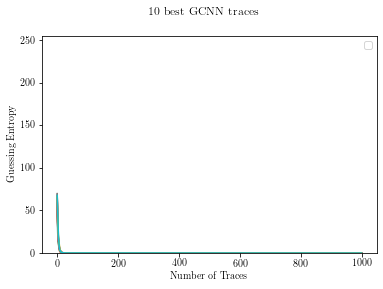

In [3]:
###Inital Hyperparam Tuning

###GCNN
gcnn_best_hp_list =plot_grid_hp_tuning('experiments\\20210107\\hyper_param_tuning_gcnn','10 best GCNN traces')
utils.save_hyperparamlist(gcnn_best_hp_list, 'CE_hypertuning_GCNN')
###2nd Run
#gcnn_best_hp_list_2 =plot_grid_hp_tuning('experiments\\hyper_param_tuning_gcnn_2','10 best GCNN traces')
#utils.save_hyperparamlist(gcnn_2_best_hp_list, 'CE_hypertuning_GCNN')

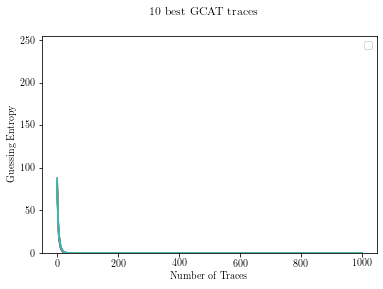

In [4]:
###GCAT
gcat_best_hp_list = plot_grid_hp_tuning('experiments\\20210107\\hyper_param_tuning_gcat','10 best GCAT traces')
utils.save_hyperparamlist(gcat_best_hp_list, 'CE_hypertuning_GCAT')

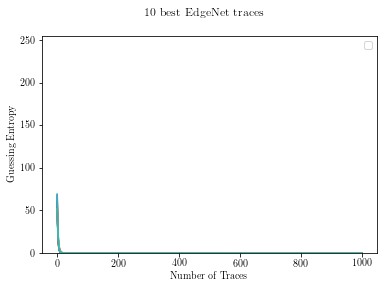

In [5]:
###EdgeNet
edgenet_best_hp_list = plot_grid_hp_tuning('experiments\\hyper_param_tuning_edgenet','10 best EdgeNet traces')
#utils.save_hyperparamlist(edgenet_best_hp_list, 'CE_hypertuning_EdgeNet')

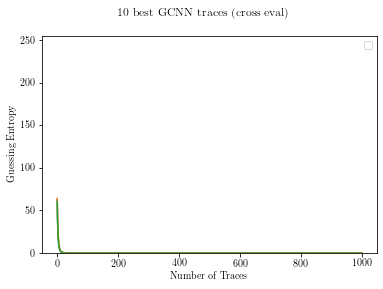

In [6]:
###Cross Eval Hyperparam Tuning
### GCNN
cross_eval_hptuning('experiments\\20210111\\CE_hypertuning_GCNN', '10 best GCNN traces (cross eval)')

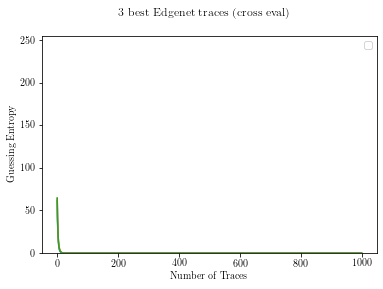

In [7]:
cross_eval_hptuning('experiments\\CE_hypertuning_EdgeNet', '3 best Edgenet traces (cross eval)')


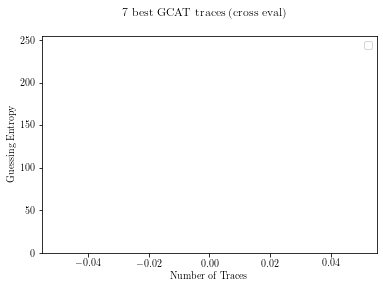

In [8]:
###GCAT
cross_eval_hptuning('experiments\\20210111\\CE_hypertuning_GCAT', '7 best GCAT traces (cross eval)')


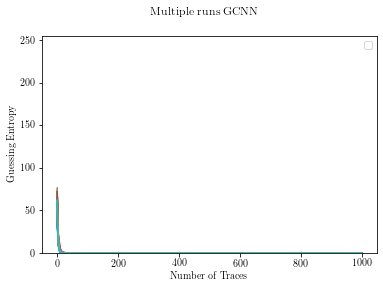

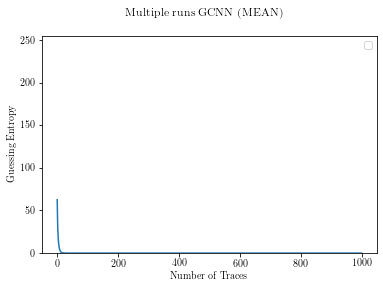

In [9]:
###Performance check for best 
###GCNN
perf_test('experiments\\20210112\\performance_test_GCNN', 'Multiple runs GCNN ')


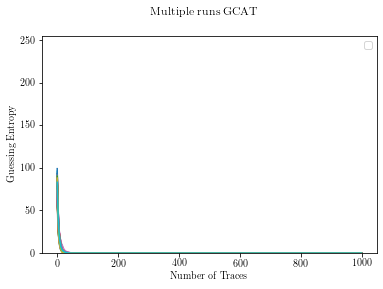

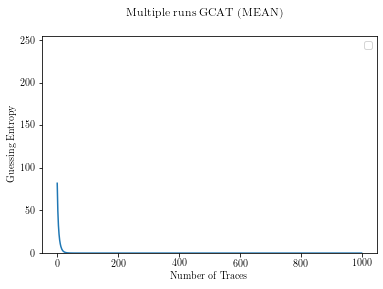

In [10]:
###GCAT
perf_test('experiments\\20210112\\performance_test_GCAT', 'Multiple runs GCAT ')


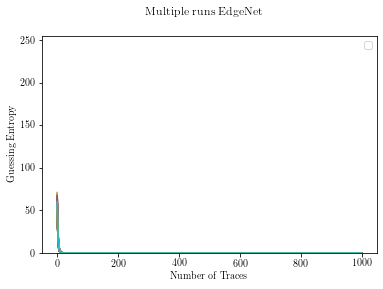

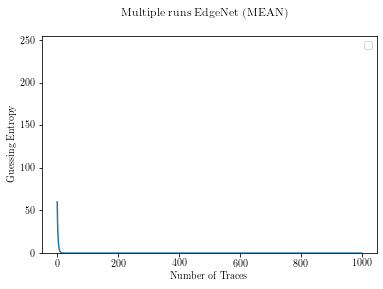

In [11]:
###EdgeNet
perf_test('experiments\\20210112\\performance_test_EdgeNet', 'Multiple runs EdgeNet ')


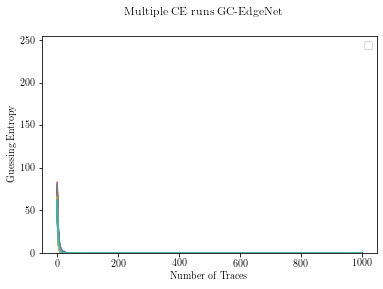

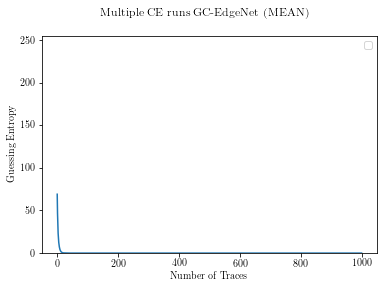

In [12]:
###GC-EdgeNet
perf_test('experiments\\20210112\\performance_test_gcedgenet', 'Multiple CE runs GC-EdgeNet ')

13.366666666666667 & 2.3378527660131967 &10.0 & 24.0
24.64 & 3.7881921809749834 &18.0 & 33.0
11.72 & 1.70926884953772 &9.0 & 18.0
14.55 & 2.8718460961548757 &11.0 & 27.0


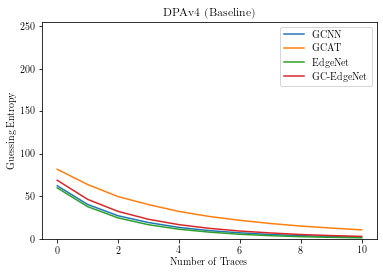

In [13]:
#Plot Baselines with different architectures
data_gcnn = np.mean(all_data['experiments\\20210112\\performance_test_GCNN']['res'], axis=0)[0:11]
data_gcat = np.mean(all_data['experiments\\20210112\\performance_test_GCAT']['res'], axis=0)[0:11]
data_edgenet = np.mean(all_data['experiments\\20210112\\performance_test_EdgeNet']['res'], axis=0)[0:11]
data_gcedgenet = np.mean(all_data['experiments\\20210112\\performance_test_gcedgenet']['res'], axis=0)[0:11]

x = np.array([data_gcnn,data_gcat,data_edgenet,data_gcedgenet])

labels = ['GCNN','GCAT','EdgeNet','GC-EdgeNet']
title='DPAv4 (Baseline)'
fig = plt.figure()
axes = plt.gca()
axes.set_ylim([0,255])

plt.ylabel(r'Guessing Entropy')
plt.xlabel(r'Number of Traces')
plt.title(title)
plt.plot(np.transpose(x))
plt.legend(labels)
#plt.savefig("DPAv4Baseline.pdf")
#plot_traces(perf_data,plot_title,[])
#plot_traces(np.mean(perf_data,axis=0),plot_title+'(MEAN)',[])
utils.get_traces_t_print(all_data['experiments\\20210112\\performance_test_GCNN']['res'])
utils.get_traces_t_print(all_data['experiments\\20210112\\performance_test_GCAT']['res'])
utils.get_traces_t_print(all_data['experiments\\20210112\\performance_test_EdgeNet']['res'])
utils.get_traces_t_print(all_data['experiments\\20210112\\performance_test_gcedgenet']['res'])


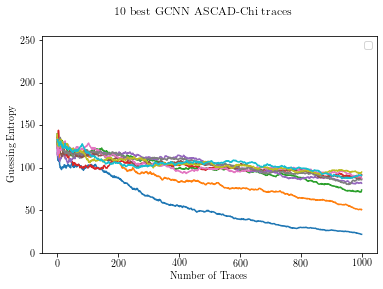

In [14]:
gcnn_ascad_Chi_best_hp_list = plot_grid_hp_tuning('experiments\\20210107\\hyper_param_tuning_gcnn_ascad_Chi','10 best GCNN ASCAD-Chi traces' )
utils.save_hyperparamlist(gcnn_ascad_Chi_best_hp_list, 'CE_hypertuning_GCNN_ascad_Chi')

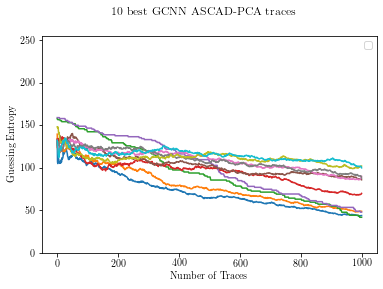

In [15]:
gcnn_ascad_pca_best_hp_list = plot_grid_hp_tuning('experiments\\20210107\\hyper_param_tuning_gcnn_ascad_PCA','10 best GCNN ASCAD-PCA traces' )
utils.save_hyperparamlist(gcnn_ascad_pca_best_hp_list, 'CE_hypertuning_GCNN_ascad_PCA')

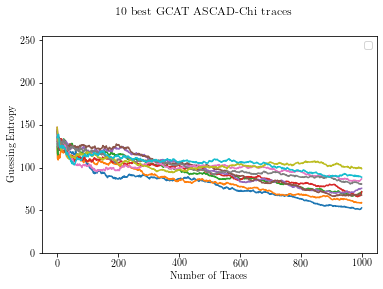

In [16]:
gcat_ascad_chi_best_hp_list = plot_grid_hp_tuning('experiments\\20210107\\hyper_param_tuning_gcat_ascad_Chi','10 best GCAT ASCAD-Chi traces' )
utils.save_hyperparamlist(gcat_ascad_chi_best_hp_list, 'CE_hypertuning_GCAT_ascad_Chi')

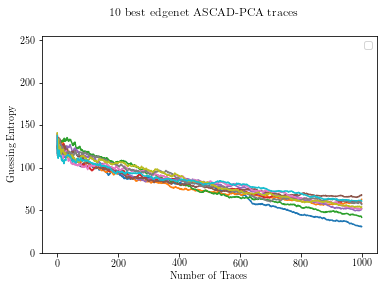

In [17]:
edgenet_ascad_pca_best_hp_list = plot_grid_hp_tuning('experiments\\hyper_param_tuning_edgenet_ascad_Chi.json','10 best edgenet ASCAD-PCA traces' )
#utils.save_hyperparamlist(gcnn_best_hp_list, 'CE_hypertuning_EdgeNet_ascad_Chi')

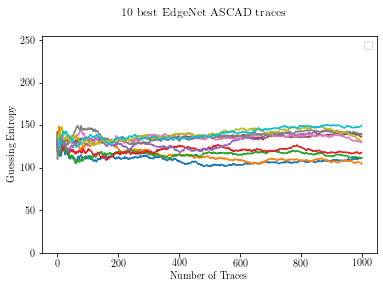

In [18]:
edgenet_ascad_best_hp_list= plot_grid_hp_tuning('experiments\\ascad_hp_tuning_edgenet.json', '10 best EdgeNet ASCAD traces')
#utils.save_hyperparamlist(gcnn_best_hp_list, 'CE_hypertuning_EdgeNet_ascad')

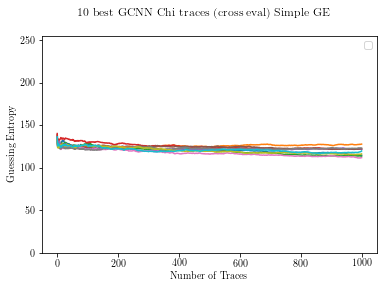

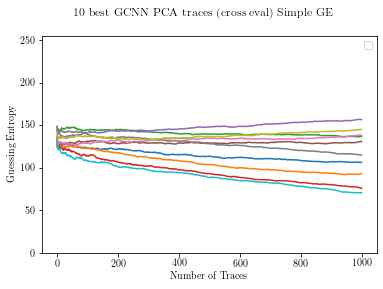

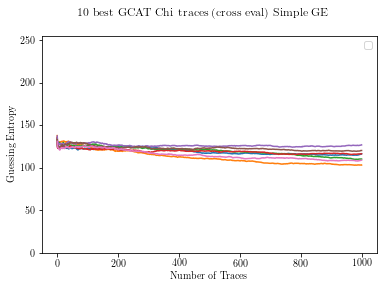

In [19]:
cross_eval_hptuning('experiments\\20210108\\CE_hypertuning_GCNN_ascad_Chi_Simple_GE', '10 best GCNN Chi traces (cross eval) Simple GE')
cross_eval_hptuning('experiments\\20210108\\CE_hypertuning_GCNN_ascad_PCA_Simple_GE', '10 best GCNN PCA traces (cross eval) Simple GE')
cross_eval_hptuning('experiments\\20210108\\CE_hypertuning_GCAT_ascad_Chi_Simple_GE', '10 best GCAT Chi traces (cross eval) Simple GE')



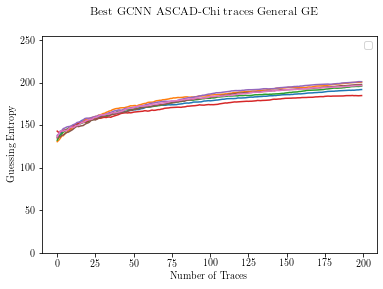

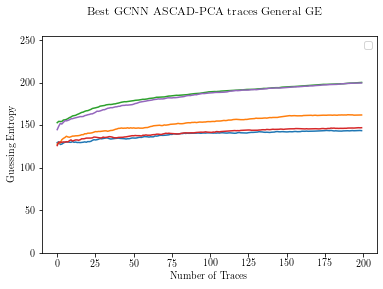

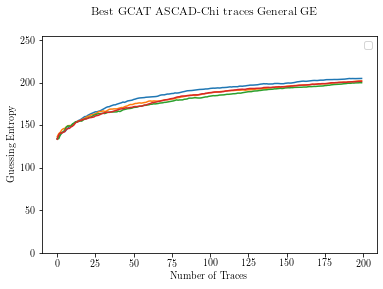

In [20]:
cross_eval_hptuning('experiments\\20210108\\CE_hypertuning_GCNN_ascad_Chi', 'Best GCNN ASCAD-Chi traces General GE')
cross_eval_hptuning('experiments\\20210108\\CE_hypertuning_GCNN_ascad_PCA', 'Best GCNN ASCAD-PCA traces General GE')
cross_eval_hptuning('experiments\\20210108\\CE_hypertuning_GCAT_ascad_Chi', 'Best GCAT ASCAD-Chi traces General GE')


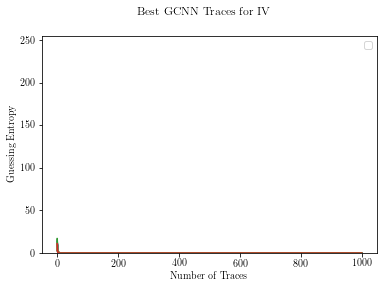

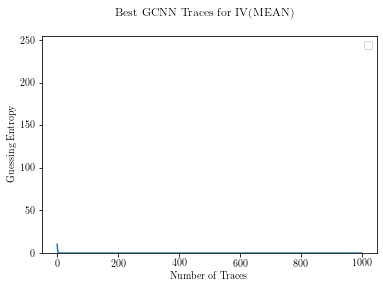

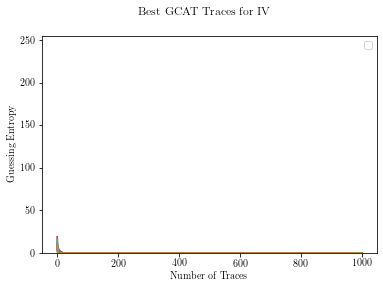

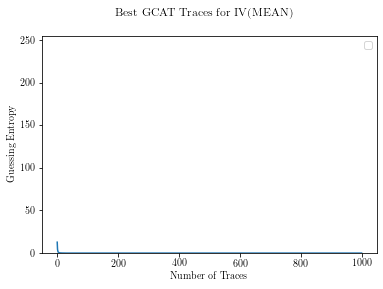

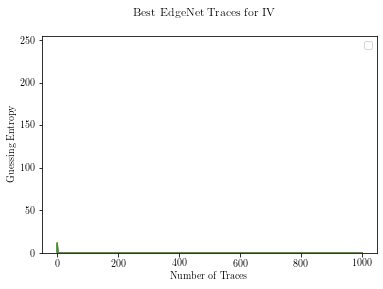

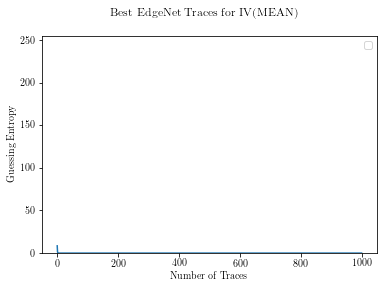

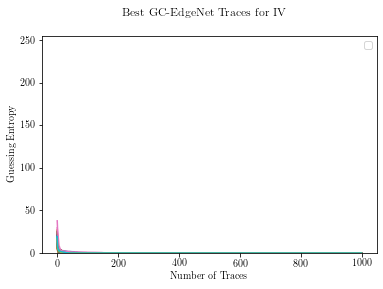

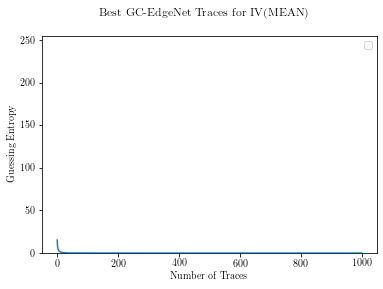

In [21]:
perf_test('experiments\\20210115\\IV_GCNN', 'Best GCNN Traces for IV')
perf_test('experiments\\20210115\\IV_GCAT', 'Best GCAT Traces for IV')
perf_test('experiments\\20210115\\IV_EdgeNet', 'Best EdgeNet Traces for IV')
perf_test('experiments\\20210115\\IV_gcedgenet', 'Best GC-EdgeNet Traces for IV')


3.5925925925925926 & 0.75812924038736 &2.0 & 6.0
4.25 & 4.437059837324712 &2.0 & 18.0
1.6153846153846154 & 0.48650425541051995 &1.0 & 2.0
15.833333333333334 & 14.788696884971158 &3.0 & 97.0


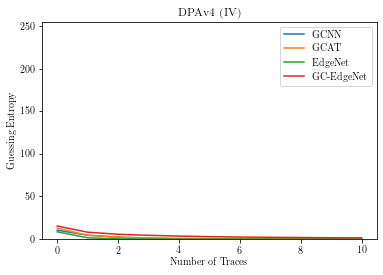

In [22]:
#Plot IV with different architectures
data_gcnn = np.mean(all_data['experiments\\20210115\\IV_GCNN']['res'], axis=0)[0:11]
data_gcat = np.mean(all_data['experiments\\20210115\\IV_GCAT']['res'], axis=0)[0:11]
data_edgenet = np.mean(all_data['experiments\\20210115\\IV_EdgeNet']['res'], axis=0)[0:11]
data_gcedgenet = np.mean(all_data['experiments\\20210115\\IV_gcedgenet']['res'], axis=0)[0:11]

x = np.array([data_gcnn,data_gcat,data_edgenet,data_gcedgenet])

labels = ['GCNN','GCAT','EdgeNet','GC-EdgeNet']
fig = plt.figure()
axes = plt.gca()
axes.set_ylim([0,255])

plt.ylabel(r'Guessing Entropy')
plt.xlabel(r'Number of Traces')

plt.title('DPAv4 (IV)')
plt.plot(np.transpose(x))
plt.legend(labels)
#plt.savefig("DPAv4IV.pdf")
#plot_traces(perf_data,plot_title,[])
#plot_traces(np.mean(perf_data,axis=0),plot_title+'(MEAN)',[])
utils.get_traces_t_print(all_data['experiments\\20210115\\IV_GCNN']['res'])
utils.get_traces_t_print(all_data['experiments\\20210115\\IV_GCAT']['res'])
utils.get_traces_t_print(all_data['experiments\\20210115\\IV_EdgeNet']['res'])
utils.get_traces_t_print(all_data['experiments\\20210115\\IV_gcedgenet']['res'])


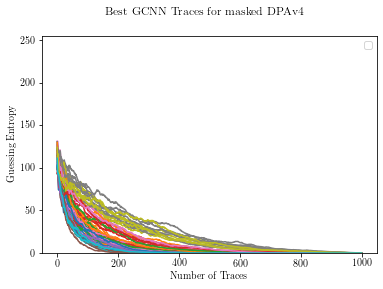

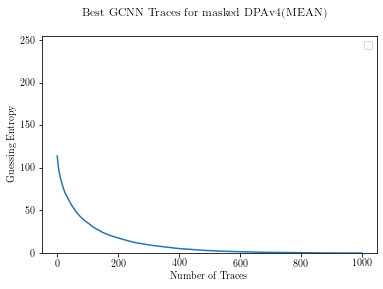

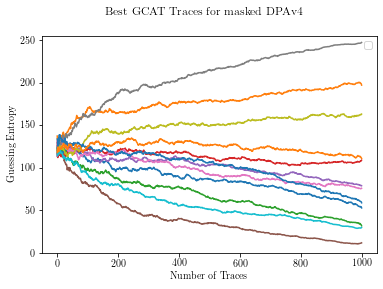

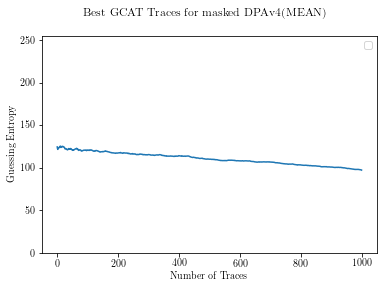

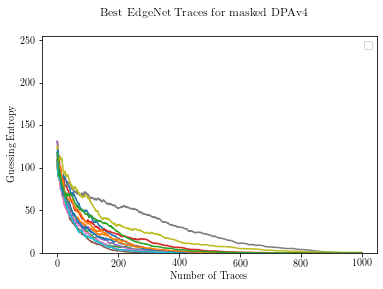

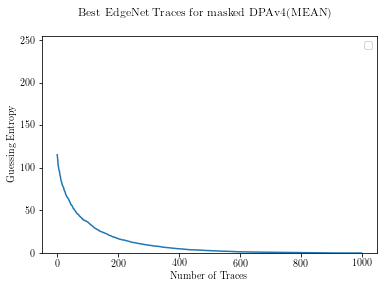

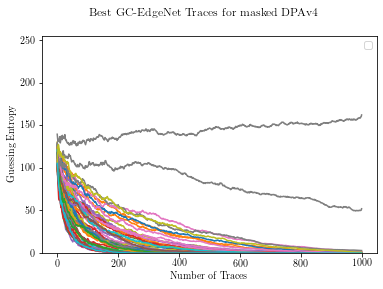

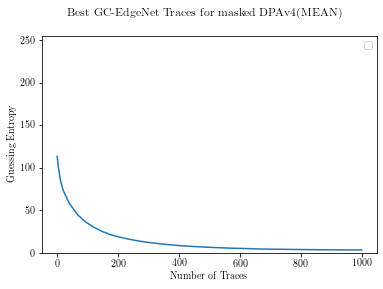

In [23]:
perf_test('experiments\\20210115\\masked_GCNN', 'Best GCNN Traces for masked DPAv4')
perf_test('experiments\\20210115\\masked_GCAT', 'Best GCAT Traces for masked DPAv4')
perf_test('experiments\\20210115\\masked_EdgeNet', 'Best EdgeNet Traces for masked DPAv4')
perf_test('experiments\\20210115\\masked_gcedgenet', 'Best GC-EdgeNet Traces for masked DPAv4')

498.68333333333334 & 222.84564850038143 &174.0 & 929.0
1001.0 & 0.0 &1001.0 & 1001.0
498.0769230769231 & 188.53053681992597 &252.0 & 898.0
485.4 & 269.87140147361544 &174.0 & 1001.0


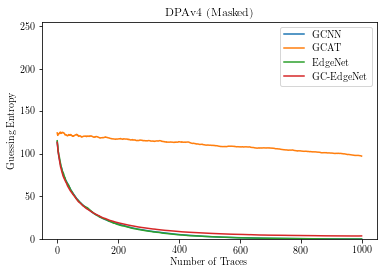

In [24]:
#Plot Masked with different architectures
data_gcnn = np.mean(all_data['experiments\\20210115\\masked_GCNN']['res'], axis=0)
data_gcat = np.mean(all_data['experiments\\20210115\\masked_GCAT']['res'], axis=0)
data_edgenet = np.mean(all_data['experiments\\20210115\\masked_EdgeNet']['res'], axis=0)
data_gcedgenet = np.mean(all_data['experiments\\20210115\\masked_gcedgenet']['res'], axis=0)

x = np.array([data_gcnn,data_gcat,data_edgenet,data_gcedgenet])

labels = ['GCNN','GCAT','EdgeNet','GC-EdgeNet']
fig = plt.figure()
axes = plt.gca()
axes.set_ylim([0,255])

plt.ylabel(r'Guessing Entropy')
plt.xlabel(r'Number of Traces')

plt.plot(np.transpose(x))
plt.title('DPAv4 (Masked)')
plt.legend(labels)
#plt.savefig("DPAv4Masked.pdf")
#plot_traces(perf_data,plot_title,[])
#plot_traces(np.mean(perf_data,axis=0),plot_title+'(MEAN)',[])
utils.get_traces_t_print(all_data['experiments\\20210115\\masked_GCNN']['res'])
utils.get_traces_t_print(all_data['experiments\\20210115\\masked_GCAT']['res'])
utils.get_traces_t_print(all_data['experiments\\20210115\\masked_EdgeNet']['res'])
utils.get_traces_t_print(all_data['experiments\\20210115\\masked_gcedgenet']['res'])


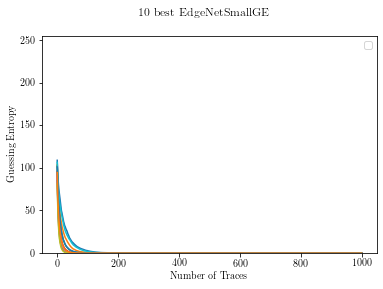

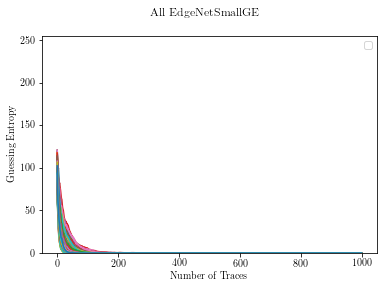

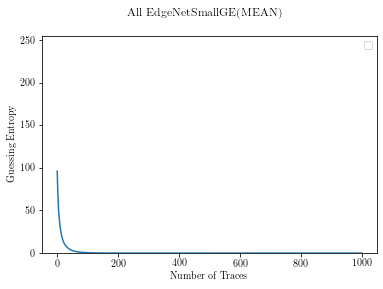

In [25]:
cross_eval_hptuning('experiments\\20201210\\EdgeNet_small_hyperparams', '10 best EdgeNetSmallGE')
perf_test('experiments\\20201210\\EdgeNet_small_hyperparams', 'All EdgeNetSmallGE')

14.0 & 2.0976176963403033 &12.0 & 18.0
16.8 & 4.214261501141095 &11.0 & 25.0
921.5 & 132.03351847163657 &634.0 & 1001.0
14.3 & 2.8301943396169813 &11.0 & 21.0
22.8 & 3.8418745424597094 &18.0 & 30.0


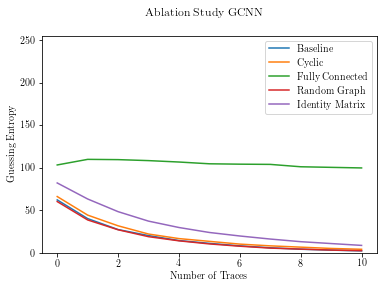

In [26]:
data = all_data['experiments\\20210125\\ablation_study_GCNN']['res']
(n,m) = data.shape
srt_data = np.reshape(data,(5,10,m))
data_mean = np.mean(srt_data, axis = 1 )
plot_traces(data_mean[:,0:11], 'Ablation Study GCNN' ,labels=['Baseline','Cyclic','Fully Connected','Random Graph','Identity Matrix'])
#plt.savefig("DPAv4_AblGCNN.pdf")
utils.get_traces_t_print(srt_data[0,:,:])
utils.get_traces_t_print(srt_data[1,:,:])
utils.get_traces_t_print(srt_data[2,:,:])
utils.get_traces_t_print(srt_data[3,:,:])
utils.get_traces_t_print(srt_data[4,:,:])


22.9 & 3.419064199455752 &17.0 & 28.0
28.2 & 7.05407683541936 &24.0 & 49.0
29.3 & 6.618912297349165 &20.0 & 37.0
23.3 & 4.428317965096905 &18.0 & 33.0
22.7 & 3.195309061734091 &18.0 & 29.0
29.3 & 7.963039620647383 &17.0 & 44.0


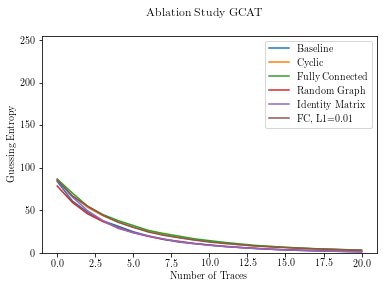

In [27]:
data_abl_gcat1 = all_data['experiments\\20210113\\ablation_study_GCAT']['res']
data_abl_gcat2 = all_data['experiments\\20210113\\ablation_study_GCAT-2']['res']
data_abl_gcat3 = all_data['experiments\\20210113\\ablation_study_GCAT-3']['res']
data_abl_gcat4 = all_data['experiments\\20210113\\ablation_study_GCAT-4']['res']
data_abl_gcat5 = all_data['experiments\\20210113\\ablation_study_GCAT-5']['res']
data_abl_gcat6 = all_data['experiments\\20210113\\ablation_study_GCAT-6']['res']

data = np.append(data_abl_gcat1,data_abl_gcat2, axis=0)
data = np.append(data,data_abl_gcat3, axis=0)
data = np.append(data,data_abl_gcat4, axis=0)
data = np.append(data,data_abl_gcat5, axis=0)
data = np.append(data,data_abl_gcat6, axis=0)

(n,m) = data.shape
srt_data = np.reshape(data,(6,10,m))
data_mean = np.mean(srt_data, axis = 1 )
plot_traces(data_mean[:,0:21], 'Ablation Study GCAT' ,labels=['Baseline','Cyclic','Fully Connected','Random Graph','Identity Matrix', 'FC, L1=0.01'])
#plt.savefig("DPAv4_AblGAT.pdf")
utils.get_traces_t_print(data_abl_gcat1)
utils.get_traces_t_print(data_abl_gcat2)
utils.get_traces_t_print(data_abl_gcat3)
utils.get_traces_t_print(data_abl_gcat4)
utils.get_traces_t_print(data_abl_gcat5)
utils.get_traces_t_print(data_abl_gcat6)

#data =  np.append(data_abl_gcat1,[data_abl_gcat2,data_abl_gcat3, data_abl_gcat4, data_abl_gcat5, data_abl_gcat6], axis=0)

11.204545454545455 & 2.0458332982668748 &5.0 & 20.0
10.08433734939759 & 1.2044577770921625 &8.0 & 13.0
6.533333333333333 & 1.3349989596333856 &4.0 & 12.0
6.326732673267327 & 1.4219559175680216 &4.0 & 12.0
36.90526315789474 & 9.499112073973325 &8.0 & 57.0
6.0989010989010985 & 1.375251785577847 &4.0 & 12.0


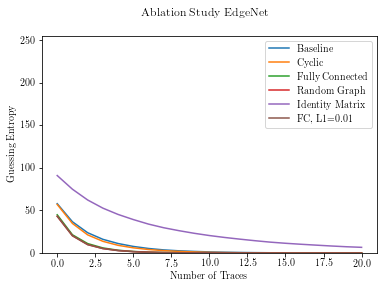

In [28]:
data_abl_edgenet1 = np.append(all_data['experiments\\20210113\\ablation_study_EdgeNet']['res'], all_data['experiments\\20210224\\ablation_study_EdgeNet_1']['res'],axis=0)
data_abl_edgenet1 = np.append(data_abl_edgenet1, all_data['experiments\\20210224\\ablation_study_EdgeNet_2']['res'],axis=0)
data_abl_edgenet1 = np.append(data_abl_edgenet1, all_data['experiments\\20210224\\ablation_study_EdgeNet_3']['res'],axis=0)
data_abl_edgenet1 = np.append(data_abl_edgenet1, all_data['experiments\\20210224\\ablation_study_EdgeNet_4']['res'],axis=0)
data_abl_edgenet1 = np.append(data_abl_edgenet1, all_data['experiments\\20210224\\ablation_study_EdgeNet_5']['res'],axis=0)
data_abl_edgenet1 = np.append(data_abl_edgenet1, all_data['experiments\\20210224\\ablation_study_EdgeNet_6']['res'],axis=0)
data_abl_edgenet1 = np.append(data_abl_edgenet1, all_data['experiments\\20210224\\ablation_study_EdgeNet_7']['res'],axis=0)
data_abl_edgenet1 = np.append(data_abl_edgenet1, all_data['experiments\\20210224\\ablation_study_EdgeNet_8']['res'],axis=0)
data_abl_edgenet1 = np.append(data_abl_edgenet1, all_data['experiments\\20210224\\ablation_study_EdgeNet_9']['res'],axis=0)
data_abl_edgenet1 = np.append(data_abl_edgenet1, all_data['experiments\\20210224\\ablation_study_EdgeNet_10']['res'],axis=0)
data_abl_edgenet1 = np.append(data_abl_edgenet1, all_data['experiments\\20210224\\ablation_study_EdgeNet_11']['res'],axis=0)
data_abl_edgenet1 = np.append(data_abl_edgenet1, all_data['experiments\\20210224\\ablation_study_EdgeNet_12']['res'],axis=0)

data_abl_edgenet2 = np.append(all_data['experiments\\20210113\\ablation_study_EdgeNet-2']['res'], all_data['experiments\\20210224\\ablation_study_EdgeNet-2_1']['res'],axis=0)
data_abl_edgenet2 = np.append(data_abl_edgenet2, all_data['experiments\\20210224\\ablation_study_EdgeNet-2_2']['res'],axis=0)
data_abl_edgenet2 = np.append(data_abl_edgenet2, all_data['experiments\\20210224\\ablation_study_EdgeNet-2_3']['res'],axis=0)
data_abl_edgenet2 = np.append(data_abl_edgenet2, all_data['experiments\\20210224\\ablation_study_EdgeNet-2_4']['res'],axis=0)
data_abl_edgenet2 = np.append(data_abl_edgenet2, all_data['experiments\\20210224\\ablation_study_EdgeNet-2_5']['res'],axis=0)
data_abl_edgenet2 = np.append(data_abl_edgenet2, all_data['experiments\\20210224\\ablation_study_EdgeNet-2_6']['res'],axis=0)
data_abl_edgenet2 = np.append(data_abl_edgenet2, all_data['experiments\\20210224\\ablation_study_EdgeNet-2_7']['res'],axis=0)
data_abl_edgenet2 = np.append(data_abl_edgenet2, all_data['experiments\\20210224\\ablation_study_EdgeNet-2_8']['res'],axis=0)
data_abl_edgenet2 = np.append(data_abl_edgenet2, all_data['experiments\\20210224\\ablation_study_EdgeNet-2_9']['res'],axis=0)
data_abl_edgenet2 = np.append(data_abl_edgenet2, all_data['experiments\\20210224\\ablation_study_EdgeNet-2_10']['res'],axis=0)
data_abl_edgenet2 = np.append(data_abl_edgenet2, all_data['experiments\\20210224\\ablation_study_EdgeNet-2_11']['res'],axis=0)
data_abl_edgenet2 = np.append(data_abl_edgenet2, all_data['experiments\\20210224\\ablation_study_EdgeNet-2_12']['res'],axis=0)

data_abl_edgenet3 = np.append(all_data['experiments\\20210113\\ablation_study_EdgeNet-2']['res'], all_data['experiments\\20210224\\ablation_study_EdgeNet-3_1']['res'],axis=0)
data_abl_edgenet3 = np.append(data_abl_edgenet3, all_data['experiments\\20210224\\ablation_study_EdgeNet-3_2']['res'],axis=0)
data_abl_edgenet3 = np.append(data_abl_edgenet3, all_data['experiments\\20210224\\ablation_study_EdgeNet-3_3']['res'],axis=0)
data_abl_edgenet3 = np.append(data_abl_edgenet3, all_data['experiments\\20210224\\ablation_study_EdgeNet-3_4']['res'],axis=0)
data_abl_edgenet3 = np.append(data_abl_edgenet3, all_data['experiments\\20210224\\ablation_study_EdgeNet-3_5']['res'],axis=0)
data_abl_edgenet3 = np.append(data_abl_edgenet3, all_data['experiments\\20210224\\ablation_study_EdgeNet-3_6']['res'],axis=0)
data_abl_edgenet3 = np.append(data_abl_edgenet3, all_data['experiments\\20210224\\ablation_study_EdgeNet-3_7']['res'],axis=0)
data_abl_edgenet3 = np.append(data_abl_edgenet3, all_data['experiments\\20210224\\ablation_study_EdgeNet-3_8']['res'],axis=0)
data_abl_edgenet3 = np.append(data_abl_edgenet3, all_data['experiments\\20210224\\ablation_study_EdgeNet-3_9']['res'],axis=0)
data_abl_edgenet3 = np.append(data_abl_edgenet3, all_data['experiments\\20210224\\ablation_study_EdgeNet-3_10']['res'],axis=0)

data_abl_edgenet4 = np.append(all_data['experiments\\20210113\\ablation_study_EdgeNet-2']['res'], all_data['experiments\\20210224\\ablation_study_EdgeNet-4_1']['res'],axis=0)
data_abl_edgenet4 = np.append(data_abl_edgenet4, all_data['experiments\\20210224\\ablation_study_EdgeNet-4_2']['res'],axis=0)
data_abl_edgenet4 = np.append(data_abl_edgenet4, all_data['experiments\\20210224\\ablation_study_EdgeNet-4_3']['res'],axis=0)
data_abl_edgenet4 = np.append(data_abl_edgenet4, all_data['experiments\\20210224\\ablation_study_EdgeNet-4_4']['res'],axis=0)
data_abl_edgenet4 = np.append(data_abl_edgenet4, all_data['experiments\\20210224\\ablation_study_EdgeNet-4_5']['res'],axis=0)
data_abl_edgenet4 = np.append(data_abl_edgenet4, all_data['experiments\\20210224\\ablation_study_EdgeNet-4_6']['res'],axis=0)
data_abl_edgenet4 = np.append(data_abl_edgenet4, all_data['experiments\\20210224\\ablation_study_EdgeNet-4_7']['res'],axis=0)
data_abl_edgenet4 = np.append(data_abl_edgenet4, all_data['experiments\\20210224\\ablation_study_EdgeNet-4_8']['res'],axis=0)
data_abl_edgenet4 = np.append(data_abl_edgenet4, all_data['experiments\\20210224\\ablation_study_EdgeNet-4_9']['res'],axis=0)
data_abl_edgenet4 = np.append(data_abl_edgenet4, all_data['experiments\\20210224\\ablation_study_EdgeNet-4_10']['res'],axis=0)
data_abl_edgenet4 = np.append(data_abl_edgenet4, all_data['experiments\\20210224\\ablation_study_EdgeNet-4_11']['res'],axis=0)
data_abl_edgenet4 = np.append(data_abl_edgenet4, all_data['experiments\\20210224\\ablation_study_EdgeNet-4_12']['res'],axis=0)

data_abl_edgenet5 = np.append(all_data['experiments\\20210113\\ablation_study_EdgeNet-2']['res'], all_data['experiments\\20210224\\ablation_study_EdgeNet-5_1']['res'],axis=0)
data_abl_edgenet5 = np.append(data_abl_edgenet5, all_data['experiments\\20210224\\ablation_study_EdgeNet-5_2']['res'],axis=0)
data_abl_edgenet5 = np.append(data_abl_edgenet5, all_data['experiments\\20210224\\ablation_study_EdgeNet-5_3']['res'],axis=0)
data_abl_edgenet5 = np.append(data_abl_edgenet5, all_data['experiments\\20210224\\ablation_study_EdgeNet-5_4']['res'],axis=0)
data_abl_edgenet5 = np.append(data_abl_edgenet5, all_data['experiments\\20210224\\ablation_study_EdgeNet-5_5']['res'],axis=0)
data_abl_edgenet5 = np.append(data_abl_edgenet5, all_data['experiments\\20210224\\ablation_study_EdgeNet-5_6']['res'],axis=0)
data_abl_edgenet5 = np.append(data_abl_edgenet5, all_data['experiments\\20210224\\ablation_study_EdgeNet-5_7']['res'],axis=0)
data_abl_edgenet5 = np.append(data_abl_edgenet5, all_data['experiments\\20210224\\ablation_study_EdgeNet-5_8']['res'],axis=0)
data_abl_edgenet5 = np.append(data_abl_edgenet5, all_data['experiments\\20210224\\ablation_study_EdgeNet-5_9']['res'],axis=0)
data_abl_edgenet5 = np.append(data_abl_edgenet5, all_data['experiments\\20210224\\ablation_study_EdgeNet-5_10']['res'],axis=0)
data_abl_edgenet5 = np.append(data_abl_edgenet5, all_data['experiments\\20210224\\ablation_study_EdgeNet-5_11']['res'],axis=0)
data_abl_edgenet5 = np.append(data_abl_edgenet5, all_data['experiments\\20210224\\ablation_study_EdgeNet-5_12']['res'],axis=0)

data_abl_edgenet6 = np.append(all_data['experiments\\20210113\\ablation_study_EdgeNet-2']['res'], all_data['experiments\\20210224\\ablation_study_EdgeNet-6_1']['res'],axis=0)
data_abl_edgenet6 = np.append(data_abl_edgenet6, all_data['experiments\\20210224\\ablation_study_EdgeNet-6_2']['res'],axis=0)
data_abl_edgenet6 = np.append(data_abl_edgenet6, all_data['experiments\\20210224\\ablation_study_EdgeNet-6_3']['res'],axis=0)
data_abl_edgenet6 = np.append(data_abl_edgenet6, all_data['experiments\\20210224\\ablation_study_EdgeNet-6_4']['res'],axis=0)
data_abl_edgenet6 = np.append(data_abl_edgenet6, all_data['experiments\\20210224\\ablation_study_EdgeNet-6_5']['res'],axis=0)
data_abl_edgenet6 = np.append(data_abl_edgenet6, all_data['experiments\\20210224\\ablation_study_EdgeNet-6_6']['res'],axis=0)
data_abl_edgenet6 = np.append(data_abl_edgenet6, all_data['experiments\\20210224\\ablation_study_EdgeNet-6_7']['res'],axis=0)
data_abl_edgenet6 = np.append(data_abl_edgenet6, all_data['experiments\\20210224\\ablation_study_EdgeNet-6_8']['res'],axis=0)
data_abl_edgenet6 = np.append(data_abl_edgenet6, all_data['experiments\\20210224\\ablation_study_EdgeNet-6_9']['res'],axis=0)
data_abl_edgenet6 = np.append(data_abl_edgenet6, all_data['experiments\\20210224\\ablation_study_EdgeNet-6_10']['res'],axis=0)
data_abl_edgenet6 = np.append(data_abl_edgenet6, all_data['experiments\\20210224\\ablation_study_EdgeNet-6_11']['res'],axis=0)


data = np.array([np.mean(data_abl_edgenet1,axis=0),np.mean(data_abl_edgenet2,axis=0),np.mean(data_abl_edgenet3,axis=0),np.mean(data_abl_edgenet4,axis=0),np.mean(data_abl_edgenet5,axis=0),np.mean(data_abl_edgenet6,axis=0)])
plot_traces(data[:,0:21], 'Ablation Study EdgeNet' ,labels=['Baseline','Cyclic','Fully Connected','Random Graph','Identity Matrix', 'FC, L1=0.01'])
plt.savefig("DPAv4_AblEdgeNet.pdf")
utils.get_traces_t_print(data_abl_edgenet1)
utils.get_traces_t_print(data_abl_edgenet2)
utils.get_traces_t_print(data_abl_edgenet3)
utils.get_traces_t_print(data_abl_edgenet4)
utils.get_traces_t_print(data_abl_edgenet5)
utils.get_traces_t_print(data_abl_edgenet6)


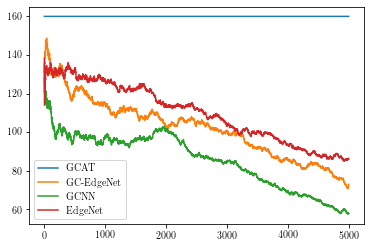

In [29]:
plt.plot(np.transpose(all_data['experiments\\20210118\\ascad_gcat']['res'])) 
plt.plot(np.transpose(all_data['experiments\\20210118\\ascad_gcedgenet']['res']))
plt.plot(np.transpose(all_data['experiments\\20210112\\ascad_gcnn']['res']))#5k
plt.plot(np.transpose(all_data['experiments\\20210114\\ascad_edgenet']['res']))
labels = ['GCAT', 'GC-EdgeNet','GCNN','EdgeNet']

plt.legend(labels)
#plt.plot(np.transpose(all_data['experiments\\20210115\\ascad_gcedgenet']['res']))#1k

9935.7 & 195.9 &9348.0 & 10001.0
10001.0 & 0.0 &10001.0 & 10001.0
10001.0 & 0.0 &10001.0 & 10001.0
10001.0 & 0.0 &10001.0 & 10001.0


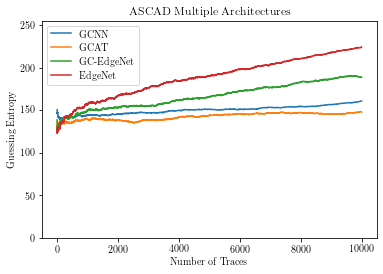

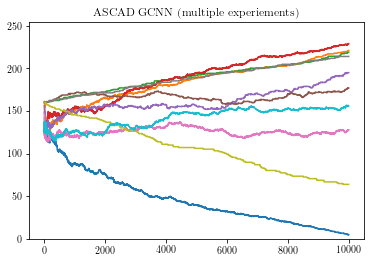

In [30]:
fig = plt.figure()
axes = plt.gca()
axes.set_ylim([0,255])

plt.ylabel(r'Guessing Entropy')
plt.xlabel(r'Number of Traces')
gcnn_data = np.append(all_data['experiments\\20210118\\ascad_gcnn']['res'],all_data['experiments\\20210202\\ascad_gcnn_1']['res'], axis=0)
gcnn_data = np.append(gcnn_data,all_data['experiments\\20210202\\ascad_gcnn_2']['res'], axis=0)
gcnn_data = np.append(gcnn_data,all_data['experiments\\20210202\\ascad_gcnn_3']['res'], axis=0)
gcnn_data = np.append(gcnn_data,all_data['experiments\\20210202\\ascad_gcnn_4']['res'], axis=0)
gcnn_data = np.append(gcnn_data,all_data['experiments\\20210203\\ascad_gcnn-1']['res'], axis=0)
gcnn_data = np.append(gcnn_data,all_data['experiments\\20210203\\ascad_gcnn-2']['res'], axis=0)
gcnn_data = np.append(gcnn_data,all_data['experiments\\20210203\\ascad_gcnn-3']['res'], axis=0)
gcnn_data = np.append(gcnn_data,all_data['experiments\\20210203\\ascad_gcnn-4']['res'], axis=0)
gcnn_data = np.append(gcnn_data,all_data['experiments\\20210203\\ascad_gcnn-5']['res'], axis=0)

gcat_data = np.append(all_data['experiments\\20210119\\ascad_gcat_10k']['res'],all_data['experiments\\20210210\\ascad_gcat']['res'],axis=0)
gcat_data = np.append(gcat_data,all_data['experiments\\20210210\\ascad_gcat-1']['res'],axis=0)
gcat_data = np.append(gcat_data,all_data['experiments\\20210212\\ascad_gcat-1']['res'],axis=0)
gcat_data = np.append(gcat_data,all_data['experiments\\20210212\\ascad_gcat']['res'],axis=0)
gcat_data = np.append(gcat_data,all_data['experiments\\20210211\\ascad_gcat']['res'],axis=0)

gcedgenet_data = np.append(all_data['experiments\\20210119\\ascad_gcedgenet_10k']['res'],all_data['experiments\\20210208\\ascad_gcedgenet']['res'], axis=0)
gcedgenet_data = np.append(gcedgenet_data,all_data['experiments\\20210212\\ascad_gcedgenet']['res'], axis=0)
gcedgenet_data = np.append(gcedgenet_data,all_data['experiments\\20210212\\ascad_gcedgenet-1']['res'], axis=0)
gcedgenet_data = np.append(gcedgenet_data,all_data['experiments\\20210211\\ascad_gcedgenet']['res'], axis=0)

edgenet_data = np.append(all_data['experiments\\20210119\\ascad_edgenet_10k']['res'],all_data['experiments\\20210211\\ascad_edgenet']['res'],axis=0)
edgenet_data = np.append(edgenet_data,all_data['experiments\\20210211\\ascad_edgenet']['res'],axis=0)
edgenet_data = np.append(edgenet_data,all_data['experiments\\20210212\\ascad_edgenet']['res'],axis=0)
edgenet_data = np.append(edgenet_data,all_data['experiments\\20210212\\ascad_edgenet-1']['res'],axis=0)

#plt.plot(np.transpose(gcnn_data[0,:])) #10k
plt.plot(np.transpose(np.mean(gcnn_data,axis=0))) #10k

plt.plot(np.transpose(np.mean(gcat_data,axis=0))) #10k
plt.plot(np.transpose(np.mean(gcedgenet_data,axis=0))) #10k
plt.plot(np.transpose(np.mean(edgenet_data,axis=0))) #10k

labels = ['GCNN','GCAT', 'GC-EdgeNet','EdgeNet']
plt.legend(labels)
plt.title('ASCAD Multiple Architectures')
plt.savefig("ASCAD_baseline.pdf")

###only plot gcnn
fig = plt.figure()
axes = plt.gca()
axes.set_ylim([0,255])
plt.plot(np.transpose(gcnn_data)) #10k
plt.title('ASCAD GCNN (multiple experiements)')
utils.get_traces_t_print(gcnn_data,threshold=10)
utils.get_traces_t_print(gcat_data,threshold=10)
utils.get_traces_t_print(gcedgenet_data,threshold=10)
utils.get_traces_t_print(edgenet_data,threshold=10)


9935.7 & 195.9 &9348.0 & 10001.0
10001.0 & 0.0 &10001.0 & 10001.0
10001.0 & 0.0 &10001.0 & 10001.0
10001.0 & 0.0 &10001.0 & 10001.0
10001.0 & 0.0 &10001.0 & 10001.0


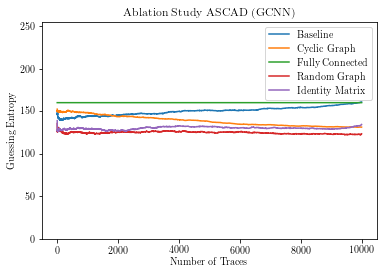

In [31]:
#ASCAD Ablation
fig = plt.figure()
axes = plt.gca()
axes.set_ylim([0,255])

plt.ylabel(r'Guessing Entropy')
plt.xlabel(r'Number of Traces')
ascad_gcnn_line =  np.append(all_data['experiments\\20210119\\ascad_gcnn_line']['res'],all_data['experiments\\20210205\\ascad_gcnn_line-1']['res'], axis=0)
ascad_gcnn_line =  np.append(ascad_gcnn_line,all_data['experiments\\20210205\\ascad_gcnn_line-2']['res'], axis=0)
ascad_gcnn_line =  np.append(ascad_gcnn_line,all_data['experiments\\20210205\\ascad_gcnn_line-3']['res'], axis=0)
ascad_gcnn_line =  np.append(ascad_gcnn_line,all_data['experiments\\20210205\\ascad_gcnn_line-4']['res'], axis=0)
ascad_gcnn_line =  np.append(ascad_gcnn_line,all_data['experiments\\20210205\\ascad_gcnn_line-5']['res'], axis=0)
ascad_gcnn_line =  np.append(ascad_gcnn_line,all_data['experiments\\20210206\\ascad_gcnn_line-1']['res'], axis=0)
ascad_gcnn_line =  np.append(ascad_gcnn_line,all_data['experiments\\20210206\\ascad_gcnn_line-2']['res'], axis=0)
ascad_gcnn_line =  np.append(ascad_gcnn_line,all_data['experiments\\20210206\\ascad_gcnn_line-3']['res'], axis=0)
ascad_gcnn_line =  np.append(ascad_gcnn_line,all_data['experiments\\20210206\\ascad_gcnn_line-4']['res'], axis=0)
ascad_gcnn_line =  np.append(ascad_gcnn_line,all_data['experiments\\20210208\\ascad_gcnn_line']['res'], axis=0)

ascad_gcnn_rnd =  np.append(all_data['experiments\\20210119\\ascad_gcnn_rnd']['res'],all_data['experiments\\20210202\\ascad_gcnn_rnd_1']['res'], axis=0)
ascad_gcnn_rnd =  np.append(ascad_gcnn_rnd,all_data['experiments\\20210202\\ascad_gcnn_rnd_2']['res'], axis=0)
ascad_gcnn_rnd =  np.append(ascad_gcnn_rnd,all_data['experiments\\20210202\\ascad_gcnn_rnd_3']['res'], axis=0)
ascad_gcnn_rnd =  np.append(ascad_gcnn_rnd,all_data['experiments\\20210202\\ascad_gcnn_rnd_4']['res'], axis=0)
ascad_gcnn_rnd =  np.append(ascad_gcnn_rnd,all_data['experiments\\20210203\\ascad_gcnn_rnd-1']['res'], axis=0)
ascad_gcnn_rnd =  np.append(ascad_gcnn_rnd,all_data['experiments\\20210203\\ascad_gcnn_rnd-2']['res'], axis=0)
ascad_gcnn_rnd =  np.append(ascad_gcnn_rnd,all_data['experiments\\20210203\\ascad_gcnn_rnd-3']['res'], axis=0)
ascad_gcnn_rnd =  np.append(ascad_gcnn_rnd,all_data['experiments\\20210203\\ascad_gcnn_rnd-4']['res'], axis=0)
ascad_gcnn_rnd =  np.append(ascad_gcnn_rnd,all_data['experiments\\20210204\\ascad_gcnn_rnd']['res'], axis=0)
ascad_gcnn_rnd =  np.append(ascad_gcnn_rnd,all_data['experiments\\20210208\\ascad_gcnn_rnd']['res'], axis=0)

ascad_gcnn_fc = np.append(all_data['experiments\\20210119\\ascad_gcnn_fc']['res'],all_data['experiments\\20210205\\ascad_gcnn_fc-1']['res'], axis=0)
ascad_gcnn_fc = np.append(ascad_gcnn_fc,all_data['experiments\\20210205\\ascad_gcnn_fc-2']['res'], axis=0)
ascad_gcnn_fc = np.append(ascad_gcnn_fc,all_data['experiments\\20210205\\ascad_gcnn_fc-3']['res'], axis=0)
ascad_gcnn_fc = np.append(ascad_gcnn_fc,all_data['experiments\\20210205\\ascad_gcnn_fc-4']['res'], axis=0)
ascad_gcnn_fc = np.append(ascad_gcnn_fc,all_data['experiments\\20210205\\ascad_gcnn_fc-5']['res'], axis=0)
ascad_gcnn_fc = np.append(ascad_gcnn_fc,all_data['experiments\\20210206\\ascad_gcnn_fc-1']['res'], axis=0)
ascad_gcnn_fc = np.append(ascad_gcnn_fc,all_data['experiments\\20210206\\ascad_gcnn_fc-2']['res'], axis=0)
ascad_gcnn_fc = np.append(ascad_gcnn_fc,all_data['experiments\\20210206\\ascad_gcnn_fc-3']['res'], axis=0)
ascad_gcnn_fc = np.append(ascad_gcnn_fc,all_data['experiments\\20210208\\ascad_gcnn_fc']['res'], axis=0)
ascad_gcnn_fc = np.append(ascad_gcnn_fc,all_data['experiments\\20210208\\ascad_gcnn_fc-1']['res'], axis=0)
ascad_gcnn_fc = np.append(ascad_gcnn_fc,all_data['experiments\\20210208\\ascad_gcnn_fc-2']['res'], axis=0)

ascad_gcnn_id = np.append(all_data['experiments\\20210119\\ascad_gcnn_ID']['res'],all_data['experiments\\20210205\\ascad_gcnn_ID-1']['res'], axis=0)
ascad_gcnn_id = np.append(ascad_gcnn_id,all_data['experiments\\20210205\\ascad_gcnn_ID-2']['res'], axis=0)
ascad_gcnn_id = np.append(ascad_gcnn_id,all_data['experiments\\20210205\\ascad_gcnn_ID-3']['res'], axis=0)
ascad_gcnn_id = np.append(ascad_gcnn_id,all_data['experiments\\20210205\\ascad_gcnn_ID-4']['res'], axis=0)
ascad_gcnn_id = np.append(ascad_gcnn_id,all_data['experiments\\20210205\\ascad_gcnn_ID-5']['res'], axis=0)
ascad_gcnn_id = np.append(ascad_gcnn_id,all_data['experiments\\20210206\\ascad_gcnn_ID-1']['res'], axis=0)
ascad_gcnn_id = np.append(ascad_gcnn_id,all_data['experiments\\20210206\\ascad_gcnn_ID-2']['res'], axis=0)
ascad_gcnn_id = np.append(ascad_gcnn_id,all_data['experiments\\20210206\\ascad_gcnn_ID-3']['res'], axis=0)
ascad_gcnn_id = np.append(ascad_gcnn_id,all_data['experiments\\20210206\\ascad_gcnn_ID-4']['res'], axis=0)
ascad_gcnn_id = np.append(ascad_gcnn_id,all_data['experiments\\20210208\\ascad_gcnn_ID']['res'], axis=0)
ascad_gcnn_id = np.append(ascad_gcnn_id,all_data['experiments\\20210208\\ascad_gcnn_ID-1']['res'], axis=0)


ascad_gcnn_IV = np.append(all_data['experiments\\20210119\\ascad_gcnn_IV']['res'],all_data['experiments\\20210202\\ascad_gcnn_IV_1']['res'], axis=0 )
ascad_gcnn_IV = np.append(ascad_gcnn_IV,all_data['experiments\\20210202\\ascad_gcnn_IV_2']['res'], axis=0 )
ascad_gcnn_IV = np.append(ascad_gcnn_IV,all_data['experiments\\20210202\\ascad_gcnn_IV_3']['res'], axis=0 )
ascad_gcnn_IV = np.append(ascad_gcnn_IV,all_data['experiments\\20210202\\ascad_gcnn_IV_4']['res'], axis=0 )
ascad_gcnn_IV = np.append(ascad_gcnn_IV,all_data['experiments\\20210203\\ascad_gcnn_IV-1']['res'], axis=0 )
ascad_gcnn_IV = np.append(ascad_gcnn_IV,all_data['experiments\\20210203\\ascad_gcnn_IV-2']['res'], axis=0 )
ascad_gcnn_IV = np.append(ascad_gcnn_IV,all_data['experiments\\20210203\\ascad_gcnn_IV-3']['res'], axis=0 )
ascad_gcnn_IV = np.append(ascad_gcnn_IV,all_data['experiments\\20210203\\ascad_gcnn_IV-4']['res'], axis=0 )
ascad_gcnn_IV = np.append(ascad_gcnn_IV,all_data['experiments\\20210203\\ascad_gcnn_IV-5']['res'], axis=0 )
ascad_gcnn_IV = np.append(ascad_gcnn_IV,all_data['experiments\\20210204\\ascad_gcnn_IV']['res'], axis=0 )

#plt.plot(np.transpose(all_data['experiments\\20210118\\ascad_gcnn']['res'])) #Baseline
plt.plot(np.transpose(np.mean(gcnn_data,axis=0))) #10k

plt.plot(np.transpose(np.mean(ascad_gcnn_line,axis=0))) #Cyclic Graph
plt.plot(np.transpose(np.mean(ascad_gcnn_fc,axis=0))) #Fully Connected
plt.plot(np.transpose(np.mean(ascad_gcnn_rnd,axis=0))) #Random
plt.plot(np.transpose(np.mean(ascad_gcnn_id,axis=0))) #Identity
#plt.plot(np.transpose(np.mean(ascad_gcnn_IV,axis=0))) #IV

labels = ['Baseline','Cyclic Graph', 'Fully Connected','Random Graph','Identity Matrix', 'Intermediate Value']
plt.legend(labels)
plt.title('Ablation Study ASCAD (GCNN)')
plt.savefig("ASCAD_ablation.pdf")

utils.get_traces_t_print(gcnn_data,threshold=10)

utils.get_traces_t_print(ascad_gcnn_line,threshold=10)
utils.get_traces_t_print(ascad_gcnn_fc,threshold=10)
utils.get_traces_t_print(ascad_gcnn_rnd,threshold=10)
utils.get_traces_t_print(ascad_gcnn_id,threshold=10)

9935.7 & 195.9 &9348.0 & 10001.0
6181.909090909091 & 4460.398320055477 &242.0 & 10001.0


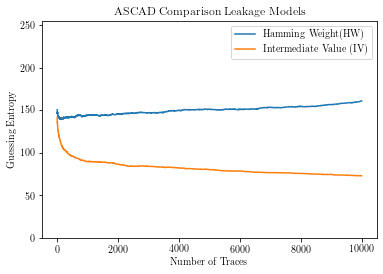

In [32]:
#comparison IV HW for ASCAD
fig = plt.figure()
axes = plt.gca()
axes.set_ylim([0,255])

plt.ylabel(r'Guessing Entropy')
plt.xlabel(r'Number of Traces')

labels = ['Hamming Weight(HW)', 'Intermediate Value (IV)']
plt.plot(np.transpose(np.mean(gcnn_data,axis=0))) #10k
plt.plot(np.transpose(np.mean(ascad_gcnn_IV,axis=0))) #Identity

plt.legend(labels)
plt.title('ASCAD Comparison Leakage Models')
plt.savefig("ASCAD_lm.pdf")

utils.get_traces_t_print(gcnn_data,threshold=10)
utils.get_traces_t_print(ascad_gcnn_IV,threshold=10)


6181.909090909091 & 4460.398320055477 &242.0 & 10001.0
8711.666666666666 & 2407.38026124296 &2369.0 & 10001.0
10001.0 & 0.0 &10001.0 & 10001.0
993.4 & 301.56200025865326 &594.0 & 1646.0
9247.09090909091 & 2384.06987597967 &1708.0 & 10001.0


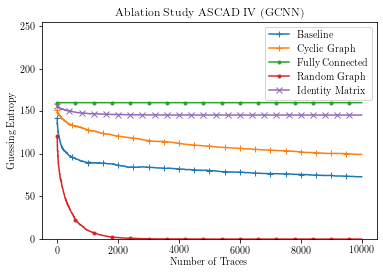

In [33]:
#ASCAD Ablation IV
fig = plt.figure()
axes = plt.gca()
axes.set_ylim([0,255])

plt.ylabel(r'Guessing Entropy')
plt.xlabel(r'Number of Traces')
plt.title('ASCAD (Desync)')

ascad_IV_rnd = np.append(all_data['experiments\\20210122\\ascad_gcnn_IV_rnd']['res'],all_data['experiments\\20210202\\ascad_gcnn_IV_rnd_1']['res'], axis=0) 
ascad_IV_rnd = np.append(ascad_IV_rnd,all_data['experiments\\20210202\\ascad_gcnn_IV_rnd_2']['res'], axis=0) 
ascad_IV_rnd = np.append(ascad_IV_rnd,all_data['experiments\\20210202\\ascad_gcnn_IV_rnd_3']['res'], axis=0) 
ascad_IV_rnd = np.append(ascad_IV_rnd,all_data['experiments\\20210202\\ascad_gcnn_IV_rnd_4']['res'], axis=0) 
ascad_IV_rnd = np.append(ascad_IV_rnd,all_data['experiments\\20210203\\ascad_gcnn_IV_rnd-1']['res'], axis=0) 
ascad_IV_rnd = np.append(ascad_IV_rnd,all_data['experiments\\20210203\\ascad_gcnn_IV_rnd-2']['res'], axis=0) 
ascad_IV_rnd = np.append(ascad_IV_rnd,all_data['experiments\\20210203\\ascad_gcnn_IV_rnd-3']['res'], axis=0) 
ascad_IV_rnd = np.append(ascad_IV_rnd,all_data['experiments\\20210203\\ascad_gcnn_IV_rnd-4']['res'], axis=0) 
ascad_IV_rnd = np.append(ascad_IV_rnd,all_data['experiments\\20210204\\ascad_gcnn_IV_rnd']['res'], axis=0) 

ascad_IV_fc = np.append(all_data['experiments\\20210122\\ascad_gcnn_IV_fc']['res'],all_data['experiments\\20210205\\ascad_gcnn_IV_fc-1']['res'], axis=0) 
ascad_IV_fc = np.append(ascad_IV_fc,all_data['experiments\\20210205\\ascad_gcnn_IV_fc-2']['res'], axis=0) 
ascad_IV_fc = np.append(ascad_IV_fc,all_data['experiments\\20210205\\ascad_gcnn_IV_fc-3']['res'], axis=0) 
ascad_IV_fc = np.append(ascad_IV_fc,all_data['experiments\\20210205\\ascad_gcnn_IV_fc-4']['res'], axis=0) 
ascad_IV_fc = np.append(ascad_IV_fc,all_data['experiments\\20210205\\ascad_gcnn_IV_fc-5']['res'], axis=0) 
ascad_IV_fc = np.append(ascad_IV_fc,all_data['experiments\\20210206\\ascad_gcnn_IV_fc-1']['res'], axis=0) 
ascad_IV_fc = np.append(ascad_IV_fc,all_data['experiments\\20210206\\ascad_gcnn_IV_fc-2']['res'], axis=0) 
ascad_IV_fc = np.append(ascad_IV_fc,all_data['experiments\\20210206\\ascad_gcnn_IV_fc-3']['res'], axis=0) 
ascad_IV_fc = np.append(ascad_IV_fc,all_data['experiments\\20210208\\ascad_gcnn_IV_fc']['res'], axis=0) 
ascad_IV_fc = np.append(ascad_IV_fc,all_data['experiments\\20210208\\ascad_gcnn_IV_fc-1']['res'], axis=0) 
ascad_IV_fc = np.append(ascad_IV_fc,all_data['experiments\\20210208\\ascad_gcnn_IV_fc-2']['res'], axis=0) 

ascad_IV_id = np.append(all_data['experiments\\20210122\\ascad_gcnn_IV_ID']['res'],all_data['experiments\\20210205\\ascad_gcnn_IV_ID-1']['res'], axis=0) 
ascad_IV_id = np.append(ascad_IV_id,all_data['experiments\\20210205\\ascad_gcnn_IV_ID-2']['res'], axis=0) 
ascad_IV_id = np.append(ascad_IV_id,all_data['experiments\\20210205\\ascad_gcnn_IV_ID-3']['res'], axis=0) 
ascad_IV_id = np.append(ascad_IV_id,all_data['experiments\\20210205\\ascad_gcnn_IV_ID-4']['res'], axis=0) 
ascad_IV_id = np.append(ascad_IV_id,all_data['experiments\\20210205\\ascad_gcnn_IV_ID-5']['res'], axis=0) 
ascad_IV_id = np.append(ascad_IV_id,all_data['experiments\\20210206\\ascad_gcnn_IV_ID-1']['res'], axis=0) 
ascad_IV_id = np.append(ascad_IV_id,all_data['experiments\\20210206\\ascad_gcnn_IV_ID-2']['res'], axis=0) 
ascad_IV_id = np.append(ascad_IV_id,all_data['experiments\\20210206\\ascad_gcnn_IV_ID-3']['res'], axis=0) 
ascad_IV_id = np.append(ascad_IV_id,all_data['experiments\\20210206\\ascad_gcnn_IV_ID-4']['res'], axis=0) 
ascad_IV_id = np.append(ascad_IV_id,all_data['experiments\\20210208\\ascad_gcnn_IV_ID']['res'], axis=0) 

ascad_IV_line = np.append(all_data['experiments\\20210122\\ascad_gcnn_IV_line']['res'],all_data['experiments\\20210205\\ascad_gcnn_IV_line-1']['res'], axis=0) 
ascad_IV_line = np.append(ascad_IV_line,all_data['experiments\\20210205\\ascad_gcnn_IV_line-2']['res'], axis=0) 
ascad_IV_line = np.append(ascad_IV_line,all_data['experiments\\20210205\\ascad_gcnn_IV_line-3']['res'], axis=0) 
ascad_IV_line = np.append(ascad_IV_line,all_data['experiments\\20210205\\ascad_gcnn_IV_line-4']['res'], axis=0) 
ascad_IV_line = np.append(ascad_IV_line,all_data['experiments\\20210205\\ascad_gcnn_IV_line-5']['res'], axis=0) 
ascad_IV_line = np.append(ascad_IV_line,all_data['experiments\\20210206\\ascad_gcnn_IV_line-2']['res'], axis=0) 
ascad_IV_line = np.append(ascad_IV_line,all_data['experiments\\20210206\\ascad_gcnn_IV_line-3']['res'], axis=0) 
ascad_IV_line = np.append(ascad_IV_line,all_data['experiments\\20210206\\ascad_gcnn_IV_line-4']['res'], axis=0) 
ascad_IV_line = np.append(ascad_IV_line,all_data['experiments\\20210206\\ascad_gcnn_IV_line-5']['res'], axis=0) 
ascad_IV_line = np.append(ascad_IV_line,all_data['experiments\\20210208\\ascad_gcnn_IV_line']['res'], axis=0) 
ascad_IV_line = np.append(ascad_IV_line,all_data['experiments\\20210208\\ascad_gcnn_IV_line-1']['res'], axis=0) 

#plt.plot(np.transpose(all_data['experiments\\20210119\\ascad_gcnn_IV']['res']),marker='+',markevery=500) #Baseline
plt.plot(np.transpose(np.mean(ascad_gcnn_IV,axis=0)),marker='+',markevery=500) #IV

plt.plot(np.transpose(np.mean(ascad_IV_line,axis=0)),marker='+',markevery=500) #Cyclic Graph
plt.plot(np.transpose(np.mean(ascad_IV_fc,axis=0)),marker='.',markevery=600) #Fully Connected
plt.plot(np.transpose(np.mean(ascad_IV_rnd,axis=0)),marker='.',markevery=600) #Random
plt.plot(np.transpose(np.mean(ascad_IV_id,axis=0)),marker='x',markevery=400) #Identity

labels = ['Baseline','Cyclic Graph', 'Fully Connected','Random Graph','Identity Matrix', 'Intermediate Value']
plt.legend(labels)
plt.title('Ablation Study ASCAD IV (GCNN)')
plt.savefig("ASCAD_ablation_IV.pdf")
utils.get_traces_t_print(ascad_gcnn_IV,threshold=10)
utils.get_traces_t_print(ascad_IV_line,threshold=10)
utils.get_traces_t_print(ascad_IV_fc,threshold=10)
utils.get_traces_t_print(ascad_IV_rnd,threshold=10)
utils.get_traces_t_print(ascad_IV_id,threshold=10)


10001.0 & 0.0 &10001.0 & 10001.0
6065.363636363636 & 3863.7127286570853 &1381.0 & 10001.0


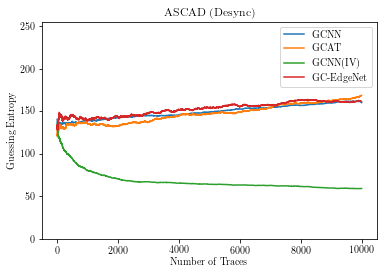

In [34]:
#ASCAD Desync
fig = plt.figure()
axes = plt.gca()
axes.set_ylim([0,255])

plt.ylabel(r'Guessing Entropy')
plt.xlabel(r'Number of Traces')
plt.title('ASCAD (Desync)')

labels = ['GCNN','GCAT','GCNN(IV)','GC-EdgeNet']
ascad_desync_IV = np.append(all_data['experiments\\20210124\\ascad_desync_IV_gcnn']['res'],all_data['experiments\\20210202\\ascad_desync_IV_gcnn_1']['res'],axis=0)
ascad_desync_IV = np.append(ascad_desync_IV,all_data['experiments\\20210202\\ascad_desync_IV_gcnn_2']['res'],axis=0)
ascad_desync_IV = np.append(ascad_desync_IV,all_data['experiments\\20210202\\ascad_desync_IV_gcnn_3']['res'],axis=0)
ascad_desync_IV = np.append(ascad_desync_IV,all_data['experiments\\20210202\\ascad_desync_IV_gcnn_4']['res'],axis=0)
ascad_desync_IV = np.append(ascad_desync_IV,all_data['experiments\\20210203\\ascad_desync_IV_gcnn']['res'],axis=0)
ascad_desync_IV = np.append(ascad_desync_IV,all_data['experiments\\20210203\\ascad_desync_IV_gcnn-1']['res'],axis=0)
ascad_desync_IV = np.append(ascad_desync_IV,all_data['experiments\\20210203\\ascad_desync_IV_gcnn-2']['res'],axis=0)
ascad_desync_IV = np.append(ascad_desync_IV,all_data['experiments\\20210203\\ascad_desync_IV_gcnn-3']['res'],axis=0)
ascad_desync_IV = np.append(ascad_desync_IV,all_data['experiments\\20210203\\ascad_desync_IV_gcnn-4']['res'],axis=0)
ascad_desync_IV = np.append(ascad_desync_IV,all_data['experiments\\20210204\\ascad_desync_IV_gcnn']['res'],axis=0)

ascad_desync_gcat = np.append(all_data['experiments\\20210121\\ascad_desync_gcat']['res'],all_data['experiments\\20210208\\ascad_desync_gcat']['res'],axis=0)
ascad_desync_gcat = np.append(ascad_desync_gcat,all_data['experiments\\20210208\\ascad_desync_gcat-1']['res'],axis=0)
ascad_desync_gcat = np.append(ascad_desync_gcat,all_data['experiments\\20210211\\ascad_desync_gcat']['res'],axis=0)

ascad_desync_gcedgenet = np.append(all_data['experiments\\20210125\\ascad_desync_gcedgenet.json']['res'],all_data['experiments\\20210208\\ascad_desync_gcedgenet']['res'],axis=0)
ascad_desync_gcedgenet = np.append(all_data['experiments\\20210125\\ascad_desync_gcedgenet.json']['res'],all_data['experiments\\20210211\\ascad_desync_gcedgenet']['res'],axis=0)

ascad_desync = np.append(all_data['experiments\\20210121\\ascad_desync_gcnn']['res'],all_data['experiments\\20210203\\ascad_desync_gcnn']['res'],axis=0)
ascad_desync = np.append(ascad_desync,all_data['experiments\\20210203\\ascad_desync_gcnn-1']['res'],axis=0)
ascad_desync = np.append(ascad_desync,all_data['experiments\\20210203\\ascad_desync_gcnn-2']['res'],axis=0)
ascad_desync = np.append(ascad_desync,all_data['experiments\\20210204\\ascad_desync_gcnn']['res'],axis=0)
ascad_desync = np.append(ascad_desync,all_data['experiments\\20210204\\ascad_desync_gcnn-1']['res'],axis=0)
ascad_desync = np.append(ascad_desync,all_data['experiments\\20210205\\ascad_desync_gcnn-1']['res'],axis=0)
ascad_desync = np.append(ascad_desync,all_data['experiments\\20210205\\ascad_desync_gcnn-2']['res'],axis=0)
ascad_desync = np.append(ascad_desync,all_data['experiments\\20210205\\ascad_desync_gcnn-3']['res'],axis=0)
ascad_desync = np.append(ascad_desync,all_data['experiments\\20210205\\ascad_desync_gcnn-4']['res'],axis=0)
ascad_desync = np.append(ascad_desync,all_data['experiments\\20210205\\ascad_desync_gcnn-5']['res'],axis=0)
ascad_desync = np.append(ascad_desync,all_data['experiments\\20210205\\ascad_desync_gcnn-6']['res'],axis=0)
ascad_desync = np.append(ascad_desync,all_data['experiments\\20210205\\ascad_desync_gcnn-7']['res'],axis=0)
ascad_desync = np.append(ascad_desync,all_data['experiments\\20210205\\ascad_desync_gcnn-8']['res'],axis=0)


plt.plot(np.transpose(np.mean(ascad_desync,axis=0))) #Baseline
plt.plot(np.transpose(np.mean(ascad_desync_gcat,axis=0))) #Cyclic Graph
plt.plot(np.transpose(np.mean(ascad_desync_IV,axis=0))) #Random
plt.plot(np.transpose(np.mean(ascad_desync_gcedgenet,axis=0))) #Random

plt.legend(labels)
plt.savefig("ASCAD_desync.pdf")
utils.get_traces_t_print(ascad_desync,threshold=10)
utils.get_traces_t_print(ascad_desync_IV,threshold=10)

909.1 & 275.7 &82.0 & 1001.0
346.2 & 428.8274244961485 &50.0 & 1001.0
40.8 & 8.8068155425216 &28.0 & 55.0
25.3 & 7.197916365171244 &16.0 & 43.0
21.2 & 4.4 &15.0 & 28.0
19.8 & 3.6 &16.0 & 28.0
23.0 & 7.974960814950754 &15.0 & 42.0
27.285714285714285 & 13.624707448647275 &15.0 & 56.0


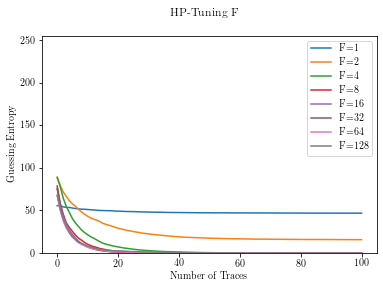

In [35]:
data = all_data['experiments\\20210118\\performance_test_GCNN_F']
CE_data = data['res']
(n, m) = CE_data.shape
CE_data = np.pad(CE_data,[(0,3),(0,0)],mode='constant',constant_values=np.nan)

CE_hyperparam = data['hyperparam']
CE_srt = np.reshape(CE_data,(8,10,m))
CE_mean = np.nanmean(CE_srt, axis = 1 )[:,0:101]
plot_traces(CE_mean, 'HP-Tuning F',['F=1','F=2','F=4','F=8','F=16','F=32','F=64','F=128','F=256'])
#plt.savefig("DPAv4_HP-Tuning-F.pdf")
utils.get_traces_t_print(CE_srt[0],threshold=1)
utils.get_traces_t_print(CE_srt[1],threshold=1)
utils.get_traces_t_print(CE_srt[2],threshold=1)
utils.get_traces_t_print(CE_srt[3],threshold=1)
utils.get_traces_t_print(CE_srt[4],threshold=1)
utils.get_traces_t_print(CE_srt[5],threshold=1)
utils.get_traces_t_print(CE_srt[6],threshold=1)
utils.get_traces_t_print(CE_srt[7][0:7,:],threshold=1)


145.7 & 285.1305139756179 &45.0 & 1001.0
34.9 & 8.757282683572571 &23.0 & 53.0
38.3 & 12.10826164236634 &23.0 & 62.0
402.4 & 400.08479101310513 &68.0 & 1001.0
950.2 & 103.48797031539463 &703.0 & 1001.0


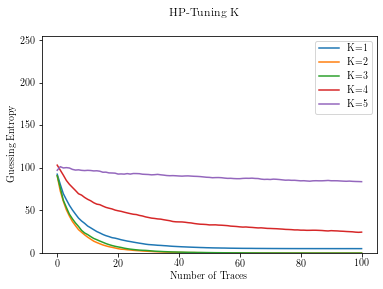

In [36]:
data = all_data['experiments\\20210118\\performance_test_GCNN_K']
CE_data = data['res']
(n, m) = CE_data.shape

CE_hyperparam = data['hyperparam']
CE_srt = np.reshape(CE_data,(5,10,m))
CE_mean = np.nanmean(CE_srt, axis = 1 )[:,0:101]
plot_traces(CE_mean, 'HP-Tuning K',['K=1','K=2','K=3','K=4','K=5'])
plt.savefig("DPAv4_HP-Tuning-K.pdf")
utils.get_traces_t_print(CE_srt[0],threshold=1)
utils.get_traces_t_print(CE_srt[1],threshold=1)
utils.get_traces_t_print(CE_srt[2],threshold=1)
utils.get_traces_t_print(CE_srt[3],threshold=1)
utils.get_traces_t_print(CE_srt[4],threshold=1)

41.2 & 11.487384384619503 &31.0 & 68.0
33.6 & 8.511169132381283 &24.0 & 55.0
30.8 & 8.364209466530594 &23.0 & 46.0
38.5 & 13.26838347350573 &26.0 & 63.0
64.4 & 38.108266819681 &34.0 & 162.0


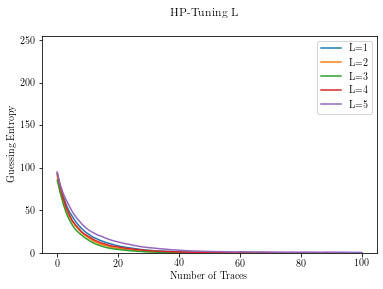

In [37]:
data = all_data['experiments\\20210118\\performance_test_GCNN_L']
CE_data = data['res']
(n, m) = CE_data.shape

CE_hyperparam = data['hyperparam']
CE_srt = np.reshape(CE_data,(5,10,m))
CE_mean = np.nanmean(CE_srt, axis = 1 )[:,0:101]
plot_traces(CE_mean, 'HP-Tuning L',['L=1','L=2','L=3','L=4','L=5'])
plt.savefig("DPAv4_HP-Tuning-L.pdf")
utils.get_traces_t_print(CE_srt[0],threshold=1)
utils.get_traces_t_print(CE_srt[1],threshold=1)
utils.get_traces_t_print(CE_srt[2],threshold=1)
utils.get_traces_t_print(CE_srt[3],threshold=1)
utils.get_traces_t_print(CE_srt[4],threshold=1)

40.1 & 18.44695096757185 &19.0 & 85.0
31.2 & 9.10823802938856 &21.0 & 53.0
43.3 & 10.564563407921787 &23.0 & 64.0
219.0 & 262.8482451910227 &94.0 & 1001.0
214.7 & 193.60271175786767 &109.0 & 787.0
860.0 & 281.3595564397982 &172.0 & 1001.0


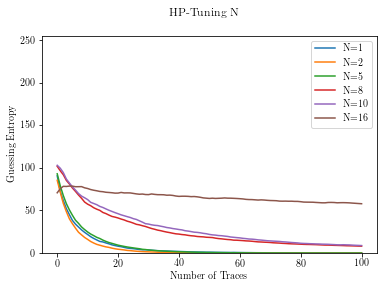

In [38]:
data = all_data['experiments\\20210118\\performance_test_GCNN_N']
CE_data = data['res']
(n, m) = CE_data.shape

CE_hyperparam = data['hyperparam']
CE_srt = np.reshape(CE_data,(6,10,m))
CE_mean = np.nanmean(CE_srt, axis = 1 )[:,0:101]
plot_traces(CE_mean, 'HP-Tuning N',['N=1','N=2','N=5','N=8','N=10','N=16'])
plt.savefig("DPAv4_HP-Tuning-N.pdf")
utils.get_traces_t_print(CE_srt[0],threshold=1)
utils.get_traces_t_print(CE_srt[1],threshold=1)
utils.get_traces_t_print(CE_srt[2],threshold=1)
utils.get_traces_t_print(CE_srt[3],threshold=1)
utils.get_traces_t_print(CE_srt[4],threshold=1)
utils.get_traces_t_print(CE_srt[5],threshold=1)


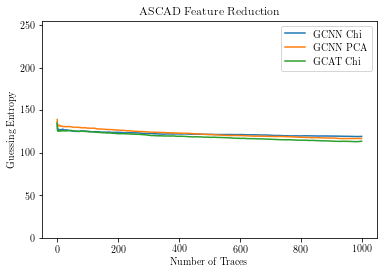

In [39]:
#ASCAD feature reduction

data_gcnn_chi = all_data['experiments\\20210108\\CE_hypertuning_GCNN_ascad_Chi_Simple_GE']['res']
data_gcnn_pca = all_data['experiments\\20210108\\CE_hypertuning_GCNN_ascad_PCA_Simple_GE']['res']
data_gcat_chi = all_data['experiments\\20210108\\CE_hypertuning_GCAT_ascad_Chi_Simple_GE']['res']

labels = ['GCNN Chi','GCNN PCA','GCAT Chi']
title='ASCAD Feature Reduction'
fig = plt.figure()
axes = plt.gca()
axes.set_ylim([0,255])

plt.ylabel(r'Guessing Entropy')
plt.xlabel(r'Number of Traces')
plt.title(title)
plt.plot(np.mean(data_gcnn_chi,axis=0))
plt.plot(np.mean(data_gcnn_pca,axis=0))
plt.plot(np.mean(data_gcat_chi,axis=0))
plt.legend(labels)
plt.savefig("ASCAD_FR.pdf")

73.9 & 45.167355468302546 &41.0 & 200.0
33.5 & 8.958236433584458 &25.0 & 56.0
22.9 & 6.609841147864297 &17.0 & 39.0
15.8 & 3.919183588453085 &12.0 & 26.0
13.366666666666667 & 2.3378527660131967 &10.0 & 24.0


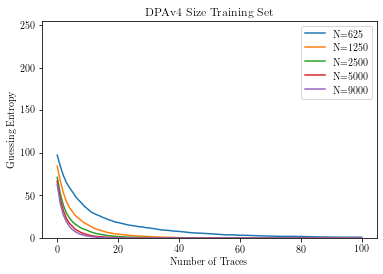

In [40]:
#training size variation
data_1 = all_data['experiments\\20210202\\performance_test_GCNN_T625']['res']
data_2 = all_data['experiments\\20210202\\performance_test_GCNN_T1250']['res']
data_3 = all_data['experiments\\20210202\\performance_test_GCNN_T2500']['res']
data_4 = all_data['experiments\\20210202\\performance_test_GCNN_T5000']['res']
data_5 = all_data['experiments\\20210112\\performance_test_GCNN']['res']


data_1_M = np.mean(data_1,axis=0)[0:101]
data_2_M = np.mean(data_2,axis=0)[0:101]
data_3_M = np.mean(data_3,axis=0)[0:101]
data_4_M = np.mean(data_4,axis=0)[0:101]

fig = plt.figure()
axes = plt.gca()
axes.set_ylim([0,255])

plt.ylabel(r'Guessing Entropy')
plt.xlabel(r'Number of Traces')
plt.title('DPAv4 Size Training Set')

labels = ['N=625','N=1250','N=2500','N=5000','N=9000']
plt.plot(data_1_M)
plt.plot(data_2_M)
plt.plot(data_3_M)
plt.plot(data_4_M)
plt.plot(np.mean(data_5,axis=0)[0:101])

plt.legend(labels)
#utils.get_traces_threshold(data_1,1)
utils.get_traces_t_print(data_1)
utils.get_traces_t_print(data_2)
utils.get_traces_t_print(data_3)
utils.get_traces_t_print(data_4)
utils.get_traces_t_print(data_5)

plt.savefig("dpa_train_size.pdf")

10001.0 & 0.0 &10001.0 & 10001.0
10001.0 & 0.0 &10001.0 & 10001.0
10001.0 & 0.0 &10001.0 & 10001.0
10001.0 & 0.0 &10001.0 & 10001.0
9935.7 & 195.9 &9348.0 & 10001.0


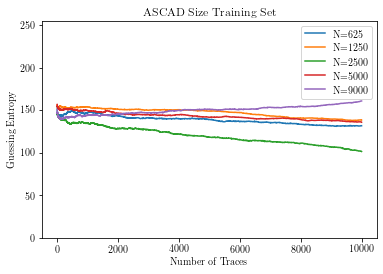

In [41]:
#training size variation
data_1 = np.append(all_data['experiments\\20210202\\ascad_gcnn_T625']['res'],all_data['experiments\\20210203\\ascad_gcnn_T625']['res'],axis=0)
data_1 = np.append(data_1,all_data['experiments\\20210203\\ascad_gcnn_T625-1']['res'],axis=0)
data_1 = np.append(data_1,all_data['experiments\\20210204\\ascad_gcnn_T625']['res'],axis=0)
data_1 = np.append(data_1,all_data['experiments\\20210205\\ascad_gcnn_T625-1']['res'],axis=0)
data_1 = np.append(data_1,all_data['experiments\\20210205\\ascad_gcnn_T625-2']['res'],axis=0)
data_1 = np.append(data_1,all_data['experiments\\20210208\\ascad_gcnn_T625']['res'],axis=0)
                   
data_2 = np.append(all_data['experiments\\20210202\\ascad_gcnn_T1250']['res'],all_data['experiments\\20210203\\ascad_gcnn_T1250']['res'],axis=0)
data_2 = np.append(data_2,all_data['experiments\\20210203\\ascad_gcnn_T1250-1']['res'],axis=0)
data_2 = np.append(data_2,all_data['experiments\\20210204\\ascad_gcnn_T1250']['res'],axis=0)
data_2 = np.append(data_2,all_data['experiments\\20210205\\ascad_gcnn_T1250-1']['res'],axis=0)
data_2 = np.append(data_2,all_data['experiments\\20210205\\ascad_gcnn_T1250-2']['res'],axis=0)
data_2 = np.append(data_2,all_data['experiments\\20210208\\ascad_gcnn_T1250']['res'],axis=0)


data_3 = np.append(all_data['experiments\\20210202\\ascad_gcnn_T2500']['res'],all_data['experiments\\20210203\\ascad_gcnn_T2500']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210203\\ascad_gcnn_T2500-1']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210204\\ascad_gcnn_T2500']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210205\\ascad_gcnn_T2500-1']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210205\\ascad_gcnn_T2500-2']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210208\\ascad_gcnn_T2500']['res'],axis=0)

data_4 = np.append(all_data['experiments\\20210202\\ascad_gcnn_T5000']['res'],all_data['experiments\\20210203\\ascad_gcnn_T5000']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210203\\ascad_gcnn_T5000-1']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210204\\ascad_gcnn_T5000']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210205\\ascad_gcnn_T5000-1']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210205\\ascad_gcnn_T5000-2']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210208\\ascad_gcnn_T5000']['res'],axis=0)


fig = plt.figure()
axes = plt.gca()
axes.set_ylim([0,255])

plt.ylabel(r'Guessing Entropy')
plt.xlabel(r'Number of Traces')
plt.title('ASCAD Size Training Set')

labels = ['N=625','N=1250','N=2500','N=5000','N=9000']
plt.plot(np.transpose(np.mean(data_1,axis=0)))
plt.plot(np.transpose(np.mean(data_2,axis=0)))
plt.plot(np.transpose(np.mean(data_3,axis=0)))
plt.plot(np.transpose(np.mean(data_4,axis=0)))
plt.plot(np.transpose(np.mean(gcnn_data,axis=0)))
plt.legend(labels)
utils.get_traces_t_print(data_1,threshold=10)
utils.get_traces_t_print(data_2,threshold=10)
utils.get_traces_t_print(data_3,threshold=10)
utils.get_traces_t_print(data_4,threshold=10)
utils.get_traces_t_print(gcnn_data,threshold=10)

plt.savefig("ascad_train_size.pdf")

7378.428571428572 & 2301.282366553971 &4783.0 & 10001.0
8392.42857142857 & 1941.8685299873168 &5031.0 & 10001.0
6323.571428571428 & 4254.374516966302 &1095.0 & 10001.0
4803.142857142857 & 4508.602552852917 &540.0 & 10001.0
6181.909090909091 & 4460.398320055477 &242.0 & 10001.0


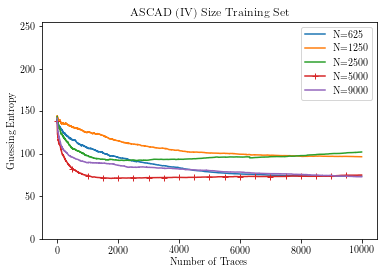

In [42]:
#training size variation
data_1 = np.append(all_data['experiments\\20210203\\ascad_gcnn_IV_T625']['res'],all_data['experiments\\20210203\\ascad_gcnn_IV_T625-1']['res'],axis=0)
data_1 = np.append(data_1,all_data['experiments\\20210204\\ascad_gcnn_IV_T625']['res'],axis=0)
data_1 = np.append(data_1,all_data['experiments\\20210205\\ascad_gcnn_IV_T625-1']['res'],axis=0)
data_1 = np.append(data_1,all_data['experiments\\20210205\\ascad_gcnn_IV_T625-2']['res'],axis=0)
data_1 = np.append(data_1,all_data['experiments\\20210208\\ascad_gcnn_IV_T625-1']['res'],axis=0)
data_1 = np.append(data_1,all_data['experiments\\20210208\\ascad_gcnn_IV_T625']['res'],axis=0)

data_2 = np.append(all_data['experiments\\20210203\\ascad_gcnn_IV_T1250']['res'],all_data['experiments\\20210203\\ascad_gcnn_IV_T1250-1']['res'],axis=0)
data_2 = np.append(data_2,all_data['experiments\\20210204\\ascad_gcnn_IV_T1250']['res'],axis=0)
data_2 = np.append(data_2,all_data['experiments\\20210205\\ascad_gcnn_IV_T1250-1']['res'],axis=0)
data_2 = np.append(data_2,all_data['experiments\\20210205\\ascad_gcnn_IV_T1250-2']['res'],axis=0)
data_2 = np.append(data_2,all_data['experiments\\20210208\\ascad_gcnn_IV_T1250-1']['res'],axis=0)
data_2 = np.append(data_2,all_data['experiments\\20210208\\ascad_gcnn_IV_T1250']['res'],axis=0)

data_3 = np.append(all_data['experiments\\20210203\\ascad_gcnn_IV_T2500']['res'],all_data['experiments\\20210203\\ascad_gcnn_IV_T2500-1']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210204\\ascad_gcnn_IV_T2500']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210205\\ascad_gcnn_IV_T2500-1']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210205\\ascad_gcnn_IV_T2500-2']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210208\\ascad_gcnn_IV_T2500-1']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210208\\ascad_gcnn_IV_T2500']['res'],axis=0)

data_4 = np.append(all_data['experiments\\20210203\\ascad_gcnn_IV_T5000']['res'], all_data['experiments\\20210203\\ascad_gcnn_IV_T5000-1']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210204\\ascad_gcnn_IV_T5000']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210205\\ascad_gcnn_IV_T5000-1']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210205\\ascad_gcnn_IV_T5000-2']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210208\\ascad_gcnn_IV_T5000-1']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210208\\ascad_gcnn_IV_T5000']['res'],axis=0)


fig = plt.figure()
axes = plt.gca()
axes.set_ylim([0,255])

plt.ylabel(r'Guessing Entropy')
plt.xlabel(r'Number of Traces')
plt.title('ASCAD (IV) Size Training Set')

labels = ['N=625','N=1250','N=2500','N=5000','N=9000']
plt.plot(np.transpose(np.mean(data_1,axis=0)))
plt.plot(np.transpose(np.mean(data_2,axis=0)))
plt.plot(np.transpose(np.mean(data_3,axis=0)))
plt.plot(np.transpose(np.mean(data_4,axis=0)),marker='+',markevery=500)
plt.plot(np.transpose(np.mean(ascad_gcnn_IV,axis=0)))
plt.legend(labels)
utils.get_traces_t_print(data_1,threshold=10)
utils.get_traces_t_print(data_2,threshold=10)
utils.get_traces_t_print(data_3,threshold=10)
utils.get_traces_t_print(data_4,threshold=10)
utils.get_traces_t_print(ascad_gcnn_IV,threshold=10)

plt.savefig("ascad_IV_train_size.pdf")

4125.3 & 352.05938419533715 &3777.0 & 4900.0
5473.6 & 658.5326415600065 &4726.0 & 6686.0
2494.2727272727275 & 430.193421806156 &1900.0 & 3308.0
2513.4545454545455 & 1595.0123603759519 &1182.0 & 7227.0
993.4 & 301.56200025865326 &594.0 & 1646.0


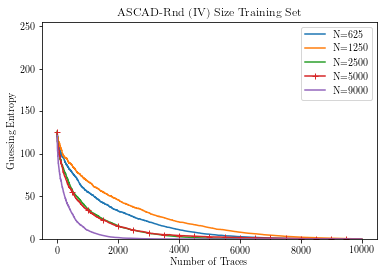

In [43]:
data_1 = np.append(all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T625-1']['res'],all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T625-2']['res'],axis=0)
data_1 = np.append(data_1,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T625-3']['res'],axis=0)
data_1 = np.append(data_1,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T625-4']['res'],axis=0)
data_1 = np.append(data_1,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T625-5']['res'],axis=0)
data_1 = np.append(data_1,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T625-6']['res'],axis=0)
data_1 = np.append(data_1,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T625-7']['res'],axis=0)
data_1 = np.append(data_1,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T625-8']['res'],axis=0)
data_1 = np.append(data_1,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T625-9']['res'],axis=0)
data_1 = np.append(data_1,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T625-10']['res'],axis=0)

data_2 = np.append(all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T1250-1']['res'],all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T1250-2']['res'],axis=0)
data_2 = np.append(data_2,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T1250-3']['res'],axis=0)
data_2 = np.append(data_2,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T1250-4']['res'],axis=0)
data_2 = np.append(data_2,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T1250-5']['res'],axis=0)
data_2 = np.append(data_2,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T1250-6']['res'],axis=0)
data_2 = np.append(data_2,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T1250-7']['res'],axis=0)
data_2 = np.append(data_2,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T1250-8']['res'],axis=0)
data_2 = np.append(data_2,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T1250-9']['res'],axis=0)
data_2 = np.append(data_2,all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T1250-1']['res'],axis=0)

data_3 = np.append(all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T2500-1']['res'],all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T2500-2']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T2500-3']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T2500-5']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T2500-6']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T2500-7']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T2500-1']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T2500-2']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T2500-3']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T2500-4']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T2500-5']['res'],axis=0)

data_4 = np.append(all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T5000-1']['res'], all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T5000-2']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T5000-3']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T5000-4']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T5000-5']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T5000-6']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T5000-7']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T5000-8']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T5000-9']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T5000-10']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T5000-11']['res'],axis=0)


fig = plt.figure()
axes = plt.gca()
axes.set_ylim([0,255])

plt.ylabel(r'Guessing Entropy')
plt.xlabel(r'Number of Traces')
plt.title('ASCAD-Rnd (IV) Size Training Set')

labels = ['N=625','N=1250','N=2500','N=5000','N=9000']
plt.plot(np.transpose(np.mean(data_1,axis=0)))
plt.plot(np.transpose(np.mean(data_2,axis=0)))
plt.plot(np.transpose(np.mean(data_3,axis=0)))
plt.plot(np.transpose(np.mean(data_4,axis=0)),marker='+',markevery=500)
plt.plot(np.transpose(np.mean(ascad_IV_rnd,axis=0)))
plt.legend(labels)
utils.get_traces_t_print(data_1,threshold=10)
utils.get_traces_t_print(data_2,threshold=10)
utils.get_traces_t_print(data_3,threshold=10)
utils.get_traces_t_print(data_4,threshold=10)
utils.get_traces_t_print(ascad_IV_rnd,threshold=10)

plt.savefig("ascad_rnd_train_size.pdf")

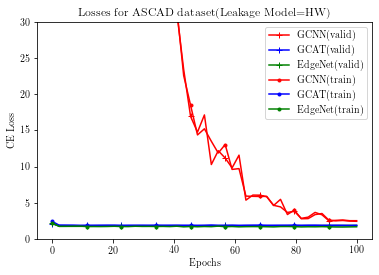

In [44]:
fig = plt.figure()
axes = plt.gca()
axes.set_ylim([0,30])

plt.ylabel(r'CE Loss')
plt.xlabel(r'Epochs')
plt.title(' Losses for ASCAD dataset(Leakage Model=HW)')
labels = ['GCNN','GCAT','EdgeNet','GCNN','GCAT','EdgeNet']
plt.legend(labels)

if (not "ascad_gcat_td" in locals()) or( not "ascad_gcat_td" in globals()):
    ascad_gcat_td = utils.getTrainVarsForSetup('ascad_gcat')
    ascad_edgenet_td = utils.getTrainVarsForSetup('ascad_edgenet')
    ascad_gcnn_td = utils.getTrainVarsForSetup('ascad_gcnn\\')
    ascad_iv_rnd_td = utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd\\')
    ascad_iv_td = utils.getTrainVarsForSetup('ascad_gcnn_IV\\')


    ascad_gcnn_td.update(utils.getTrainVarsForSetup('ascad_gcnn-1\\'))
    ascad_gcnn_td.update(utils.getTrainVarsForSetup('ascad_gcnn-2\\'))
    ascad_gcnn_td.update(utils.getTrainVarsForSetup('ascad_gcnn-3\\'))
    ascad_gcnn_td.update(utils.getTrainVarsForSetup('ascad_gcnn-4\\'))
    ascad_gcnn_td.update(utils.getTrainVarsForSetup('ascad_gcnn-5\\'))

    ascad_gcnn_td.update(utils.getTrainVarsForSetup('ascad_gcnn_1\\'))
    ascad_gcnn_td.update(utils.getTrainVarsForSetup('ascad_gcnn_2\\'))
    ascad_gcnn_td.update(utils.getTrainVarsForSetup('ascad_gcnn_3\\'))
    ascad_gcnn_td.update(utils.getTrainVarsForSetup('ascad_gcnn_4\\'))
    ascad_gcnn_td.update(utils.getTrainVarsForSetup('ascad_gcnn_5\\'))


    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV-1\\'))
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV-2\\'))
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV-3\\'))
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV-4\\'))
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV-5\\'))

    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_1\\'))
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_2\\'))
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_3\\'))
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_4\\'))
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_5\\'))

    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd-1\\'))
    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd-2\\'))
    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd-3\\'))
    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd-4\\'))
    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd-5\\'))

    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd_1\\'))
    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd_2\\'))
    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd_3\\'))
    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd_4\\'))
    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd_5\\'))


ascad_gcat_valid, ascad_gcat_train = utils.showTrainLosses(ascad_gcat_td)
ascad_edgenet_valid, ascad_edgenet_train = utils.showTrainLosses(ascad_edgenet_td)
ascad_gcnn_valid, ascad_gcnn_train = utils.showTrainLosses(ascad_gcnn_td)
ascad_iv_rnd_valid,ascad_iv_rnd_train = utils.showTrainLosses(ascad_iv_rnd_td)
ascad_iv_valid,ascad_iv_train = utils.showTrainLosses(ascad_iv_td)

xvals_train = np.linspace(0,100,4500)
xvals_valid = np.linspace(0,100,45)

idx = np.arange(0,4500,100)
ascad_gcnn_train = ascad_gcnn_train[:,idx]
ascad_gcat_train = ascad_gcat_train[:,idx]
ascad_edgenet_train = ascad_edgenet_train[:,idx]

#plt.yscale('log')
plt.plot(xvals_valid,np.transpose(np.mean(ascad_gcnn_valid,axis=0)),color='r',marker='+',markevery=5)
plt.plot(xvals_valid,np.transpose(np.mean(ascad_gcat_valid,axis=0)),color='b',marker='+',markevery=5)
plt.plot(xvals_valid,np.transpose(np.mean(ascad_edgenet_valid,axis=0)),color='g',marker='+',markevery=5)

plt.plot(xvals_valid,np.transpose(np.mean(ascad_gcnn_train,axis=0)),color='r',marker='.',markevery=5)
plt.plot(xvals_valid,np.transpose(np.mean(ascad_gcat_train,axis=0)),color='b',marker='.',markevery=5)
plt.plot(xvals_valid,np.transpose(np.mean(ascad_edgenet_train,axis=0)),color='g',marker='.',markevery=5)

#plt.plot(xvals_valid,np.transpose(np.mean(ascad_iv_valid,axis=0)))
#plt.plot(xvals_valid,np.transpose(np.mean(ascad_iv_rnd_valid,axis=0)))
plt.legend(['GCNN(valid)','GCAT(valid)','EdgeNet(valid)','GCNN(train)','GCAT(train)','EdgeNet(train)'])
plt.savefig("ascad_losses_hw.pdf")
if False:
    fig = plt.figure()
    axes = plt.gca()

    plt.ylabel(r'Training Loss')
    plt.xlabel(r'Epochs')
    plt.title(' Training Loss')
    labels = ['GCNN','GCAT','EdgeNet','GCNN(IV)' ,'GCNN(IVrnd)']
    plt.legend(labels)
    plt.yscale('log')

    plt.plot(xvals_train,np.transpose(np.mean(ascad_gcnn_train,axis=0)))
    plt.plot(xvals_train,np.transpose(np.mean(ascad_gcat_train,axis=0)))
    plt.plot(xvals_train,np.transpose(np.mean(ascad_edgenet_train,axis=0)))
    #plt.plot(xvals_train,np.transpose(np.mean(ascad_iv_train,axis=0)))
    #plt.plot(xvals_train,np.transpose(np.mean(ascad_v_rnd_train,axis=0)))

    #plt.xticks(np.arange(0, 1, step=0.2))




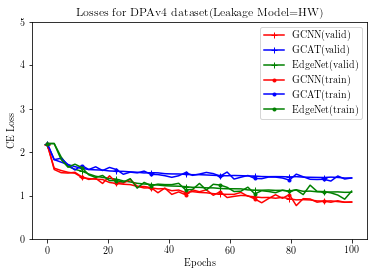

In [45]:
dpav4_gcnn_td = utils.getTrainVarsForSetup('performance_test_GCNN\\')
dpav4_gcat_td = utils.getTrainVarsForSetup('performance_test_GCAT\\')
dpav4_edgenet_td = utils.getTrainVarsForSetup('20210112\\performance_test_EdgeNet\\')

dpav4_gcnn_valid, dpav4_gcnn_train = utils.showTrainLosses(dpav4_gcnn_td)
dpav4_gcat_valid, dpav4_gcat_train = utils.showTrainLosses(dpav4_gcat_td)
dpav4_edgenet_valid, dpav4_edgenet_train = utils.showTrainLosses(dpav4_edgenet_td)

idx = np.arange(0,4500,100)
dpav4_gcnn_train = dpav4_gcnn_train[:,idx]
dpav4_gcat_train = dpav4_gcat_train[:,idx]
dpav4_edgenet_train = dpav4_edgenet_train[:,idx]
fig = plt.figure()
axes = plt.gca()
axes.set_ylim([0,5])

plt.ylabel(r'CE Loss')
plt.xlabel(r'Epochs')

plt.plot(xvals_valid,np.transpose(np.mean(dpav4_gcnn_valid,axis=0)),color='r',marker='+',markevery=5)
plt.plot(xvals_valid,np.transpose(np.mean(dpav4_gcat_valid,axis=0)),color='b',marker='+',markevery=5)
plt.plot(xvals_valid,np.transpose(np.mean(dpav4_edgenet_valid,axis=0)),color='g',marker='+',markevery=5)

plt.plot(xvals_valid,np.transpose(np.mean(dpav4_gcnn_train,axis=0)),color='r',marker='.',markevery=5)
plt.plot(xvals_valid,np.transpose(np.mean(dpav4_gcat_train,axis=0)),color='b',marker='.',markevery=5)
plt.plot(xvals_valid,np.transpose(np.mean(dpav4_edgenet_train,axis=0)),color='g',marker='.',markevery=5)
plt.legend(['GCNN(valid)','GCAT(valid)','EdgeNet(valid)','GCNN(train)','GCAT(train)','EdgeNet(train)'])
plt.title('Losses for DPAv4 dataset(Leakage Model=HW)')
plt.savefig("dpa_losses.pdf")

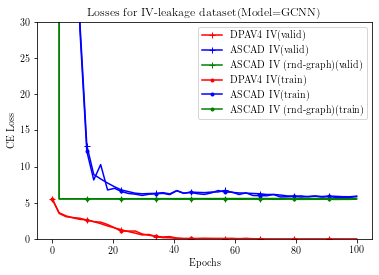

In [46]:
if (not "dpav4_gcnn_iv_td" in locals()) or( not "dpav4_gcnn_iv_td" in globals()):

    dpav4_gcnn_iv_td =utils.getTrainVarsForSetup('IV_GCNN\\')    
    ascad_iv_rnd_td = utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd\\')
    ascad_iv_td = utils.getTrainVarsForSetup('ascad_gcnn_IV\\')
    ascad_gcnn_rnd = utils.getTrainVarsForSetup('ascad_gcnn_rnd\\')
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV-1\\'))
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV-2\\'))
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV-3\\'))
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV-4\\'))
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV-5\\'))

    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_1\\'))
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_2\\'))
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_3\\'))
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_4\\'))
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_5\\'))

    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd-1\\'))
    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd-2\\'))
    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd-3\\'))
    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd-4\\'))
    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd-5\\'))

    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd_1\\'))
    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd_2\\'))
    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd_3\\'))
    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd_4\\'))
    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd_5\\'))
    
dpav4_gcnn_iv_valid, dpav4_gcnn_iv_train = utils.showTrainLosses(dpav4_gcnn_iv_td)
ascad_iv_valid, ascad_iv_train = utils.showTrainLosses(ascad_iv_td)
ascad_iv_rnd_valid, ascad_iv_rnd_train = utils.showTrainLosses(ascad_iv_rnd_td)

idx = np.arange(0,4500,100)
dpav4_gcnn_iv_train = dpav4_gcnn_iv_train[:,idx]
ascad_iv_train = ascad_iv_train[:,idx]
ascad_iv_rnd_train = ascad_iv_rnd_train[:,idx]
fig = plt.figure()
axes = plt.gca()
axes.set_ylim([0,30])


plt.ylabel(r'CE Loss')
plt.xlabel(r'Epochs')

plt.plot(xvals_valid,np.transpose(np.mean(dpav4_gcnn_iv_valid,axis=0)),color='r',marker='+',markevery=5)
plt.plot(xvals_valid,np.transpose(np.mean(ascad_iv_valid,axis=0)),color='b',marker='+',markevery=5)
plt.plot(xvals_valid,np.transpose(np.mean(ascad_iv_rnd_valid,axis=0)),color='g',marker='+',markevery=5)

plt.plot(xvals_valid,np.transpose(np.mean(dpav4_gcnn_iv_train,axis=0)),color='r',marker='.',markevery=5)
plt.plot(xvals_valid,np.transpose(np.mean(ascad_iv_train,axis=0)),color='b',marker='.',markevery=5)
plt.plot(xvals_valid,np.transpose(np.mean(ascad_iv_rnd_train,axis=0)),color='g',marker='.',markevery=5)
plt.legend(['DPAV4 IV(valid)','ASCAD IV(valid)','ASCAD IV (rnd-graph)(valid)','DPAV4 IV(train)','ASCAD IV(train)','ASCAD IV (rnd-graph)(train)'])
plt.title('Losses for IV-leakage dataset(Model=GCNN)')
plt.savefig("losses_IV.pdf")

A_ascad_700_KNN Correlation_5.npy
A_ascad_700_Random_5.npy
A_ascad_700_KNN Correlation_10.npy
A_ascad_700_Random_10.npy
A_ascad_700_KNN Correlation_25.npy
A_ascad_700_Random_25.npy
A_ascad_700_KNN Correlation_50.npy
A_ascad_700_Random_50.npy
A_ascad_700_KNN Correlation_100.npy
A_ascad_700_Random_100.npy


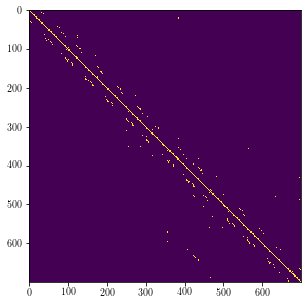

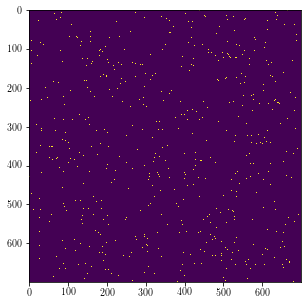

In [47]:
dataset = 'ascad'
nFeatures = 700
threshold = 5
(traces,_,_,_)= import_traces.import_traces(False, dataset,True, 10000) 

(A_knn5,_) =gg.get_graph(dataset,nFeatures,"KNN Correlation",threshold,traces)
(A_rnd5,_) =gg.get_graph(dataset,nFeatures,"Random",threshold,traces)
(A_knn10,_) =gg.get_graph(dataset,nFeatures,"KNN Correlation",10,traces)
(A_rnd10,_) =gg.get_graph(dataset,nFeatures,"Random",10,traces)
(A_knn25,_) =gg.get_graph(dataset,nFeatures,"KNN Correlation",25,traces)
(A_rnd25,_) =gg.get_graph(dataset,nFeatures,"Random",25,traces)
(A_knn50,_) =gg.get_graph(dataset,nFeatures,"KNN Correlation",50,traces)
(A_rnd50,_) =gg.get_graph(dataset,nFeatures,"Random",50,traces)
(A_knn100,_) =gg.get_graph(dataset,nFeatures,"KNN Correlation",100,traces)
(A_rnd100,_) =gg.get_graph(dataset,nFeatures,"Random",100,traces)

fig = plt.figure(figsize=(5, 5)) # in inches
plt.imshow(A_knn5, interpolation="none")
fig = plt.figure(figsize=(5, 5)) # in inches
plt.imshow(A_rnd5, interpolation="none")



<Figure size 360x1800 with 0 Axes>

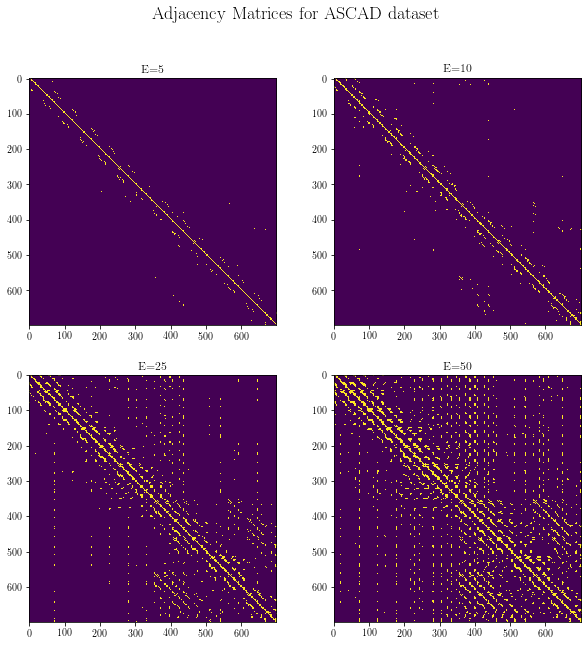

In [70]:
fig = plt.figure(figsize=(5, 25)) # in inches
fig, axs = plt.subplots(2, 2,figsize=(10,10))
fig.suptitle('Adjacency Matrices for ASCAD dataset', fontsize=18)
axs[0][0].set_title("E=5")
axs[0][1].set_title("E=10")
axs[1][0].set_title("E=25")
axs[1][1].set_title("E=50")
#axs[4].set_title("E=100")

axs[0][0].imshow(A_knn5, interpolation="none")
axs[0][1].imshow(A_knn10, interpolation="none")
axs[1][0].imshow(A_knn25, interpolation="none")
axs[1][1].imshow(A_knn50, interpolation="none")
#axs[4].imshow(A_knn100, interpolation="none")

plt.savefig("ASCADAdj_Square.pdf")

if False:
    axs[1][0].imshow(A_rnd5, interpolation="none")
    axs[1][1].imshow(A_rnd10, interpolation="none")
    axs[1][2].imshow(A_rnd25, interpolation="none")
    axs[1][3].imshow(A_rnd50, interpolation="none")
    axs[1][4].imshow(A_rnd100, interpolation="none")

A_dpa4_50_KNN Correlation_10.npy
A_dpa4_50_KNN Correlation_2.npy
A_dpa4_50_KNN Correlation_5.npy
A_dpa4_50_KNN Correlation_8.npy
A_dpa4_50_Random_5.npy


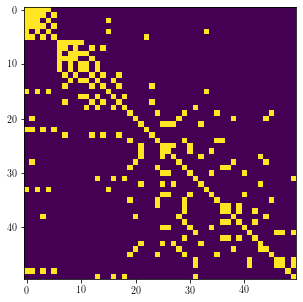

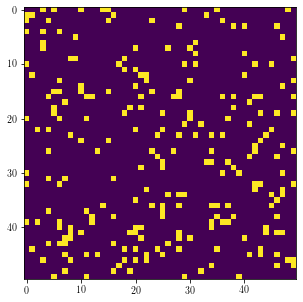

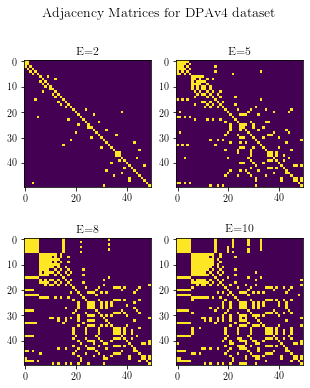

In [71]:
dataset = 'dpa4'
nFeatures = 50
threshold = 5
(traces,_,_,_)= import_traces.import_traces(False, dataset,False, 10000) 

(A_10nn,_) =gg.get_graph(dataset,nFeatures,"KNN Correlation",10,traces)
(A_2nn,_) =gg.get_graph(dataset,nFeatures,"KNN Correlation",2,traces)
(A_5nn,_) =gg.get_graph(dataset,nFeatures,"KNN Correlation",threshold,traces)
(A_8nn,_) =gg.get_graph(dataset,nFeatures,"KNN Correlation",8,traces)


(A_rnd,_) =gg.get_graph(dataset,nFeatures,"Random",threshold,traces)
fig = plt.figure(figsize=(5, 5)) # in inches
plt.imshow(A_knn, interpolation="none")
plt.savefig("DPAv4AjKnn.pdf")

fig = plt.figure(figsize=(5, 5)) # in inches
plt.imshow(A_rnd, interpolation="none")
plt.savefig("DPAv4ARnd.pdf")


fig, axs = plt.subplots(2, 2,figsize=(5,6))
fig.suptitle('Adjacency Matrices for DPAv4 dataset', fontsize=14)
axs[0][0].set_title("E=2")
axs[0][1].set_title("E=5")
axs[1][0].set_title("E=8")
axs[1][1].set_title("E=10")

#axs[4].set_title("E=100")

axs[0][0].imshow(A_2nn, interpolation="none")
axs[0][1].imshow(A_5nn, interpolation="none")
axs[1][0].imshow(A_8nn, interpolation="none")
axs[1][1].imshow(A_10nn, interpolation="none")

plt.savefig("DPAvSquare.pdf")


A_dpa4_50_Random_5.npy
A_dpa4_50_Fully Connected_5.npy
A_dpa4_50_Identity_5.npy
A_dpa4_50_Successive_5.npy


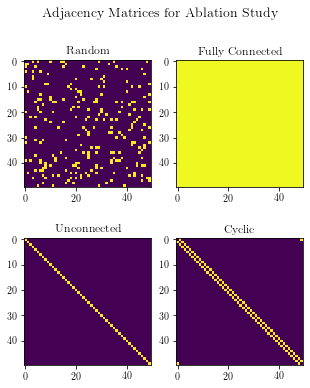

In [13]:
dataset = 'dpa4'
nFeatures = 50
threshold = 5
(traces,_,_,_)= import_traces.import_traces(False, dataset,False, 10000) 

(A_rnd,_) =gg.get_graph(dataset,nFeatures,"Random",threshold,traces)
(A_fc,_) =gg.get_graph(dataset,nFeatures,"Fully Connected",threshold,traces)
(A_id,_) =gg.get_graph(dataset,nFeatures,"Identity",threshold,traces)
(A_cyc,_) =gg.get_graph(dataset,nFeatures,"Successive",threshold,traces)



fig, axs = plt.subplots(2, 2,figsize=(5,6))
fig.suptitle('Adjacency Matrices for Ablation Study', fontsize=14)
axs[0][0].set_title("Random")
axs[0][1].set_title("Fully Connected")
axs[1][0].set_title("Unconnected")
axs[1][1].set_title("Cyclic")

#axs[4].set_title("E=100")

axs[0][0].imshow(A_rnd, interpolation="none")
axs[0][1].imshow(A_fc, cmap=plt.get_cmap('plasma_r'))
axs[1][0].imshow(A_id, interpolation="none")
axs[1][1].imshow(A_cyc, interpolation="none")

plt.savefig("DPAvSquareAbl.pdf")

1001.0 & 0.0 &1001.0 & 1001.0
1001.0 & 0.0 &1001.0 & 1001.0
16.3 & 2.6851443164195103 &13.0 & 20.0
14.0 & 2.792848008753788 &11.0 & 21.0
23.8 & 2.85657137141714 &21.0 & 31.0
72.0 & 12.0 &nan & nan


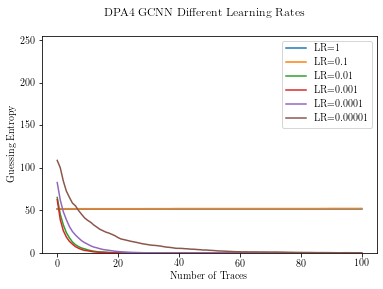

In [50]:
#Learning Rate
#dpav4 for sanity check
LR_dpa4 = all_data['experiments\\20210219\\LR_study_GCNN']['res']
(n, m) = LR_dpa4.shape
LR_dpa4 = np.pad(LR_dpa4,[(0,8),(0,0)],mode='constant',constant_values=np.nan)
LR_dpa4 = np.reshape(LR_dpa4,(6,10,m))
LR_dpa4_mean = np.nanmean(LR_dpa4, axis = 1 )[:,0:101]
plot_traces(LR_dpa4_mean, 'DPA4 GCNN Different Learning Rates',['LR=1','LR=0.1','LR=0.01','LR=0.001','LR=0.0001','LR=0.00001'])

utils.get_traces_t_print(LR_dpa4[0],threshold=1)
utils.get_traces_t_print(LR_dpa4[1],threshold=1)
utils.get_traces_t_print(LR_dpa4[2],threshold=1)
utils.get_traces_t_print(LR_dpa4[3],threshold=1)
utils.get_traces_t_print(LR_dpa4[4],threshold=1)
utils.get_traces_t_print(LR_dpa4[5],threshold=1)
plt.savefig("DPAv4ALR.pdf")


10001.0 & 0.0 &10001.0 & 10001.0
10001.0 & 0.0 &10001.0 & 10001.0
10001.0 & 0.0 &10001.0 & 10001.0
10001.0 & 0.0 &10001.0 & 10001.0


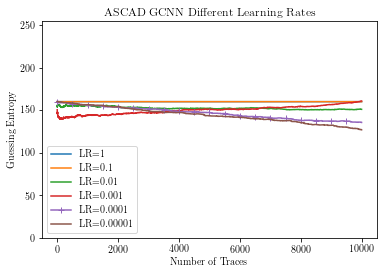

In [51]:
#Learning Rate
#ASCAD 

LRe0 = np.append(all_data['experiments\\20210219\\ascad_gcnn_LRe0-1']['res'],all_data['experiments\\20210219\\ascad_gcnn_LRe0-2']['res'],axis=0)
LRe0 = np.append(LRe0,all_data['experiments\\20210219\\ascad_gcnn_LRe0-3']['res'],axis=0)
LRe0 = np.append(LRe0,all_data['experiments\\20210219\\ascad_gcnn_LRe0-4']['res'],axis=0)
LRe0 = np.append(LRe0,all_data['experiments\\20210219\\ascad_gcnn_LRe0-5']['res'],axis=0)

LRe1 = np.append(all_data['experiments\\20210219\\ascad_gcnn_LRe-1-1']['res'],all_data['experiments\\20210219\\ascad_gcnn_LRe-1-2']['res'],axis=0)
LRe1 = np.append(LRe1,all_data['experiments\\20210219\\ascad_gcnn_LRe-1-3']['res'],axis=0)
LRe1 = np.append(LRe1,all_data['experiments\\20210219\\ascad_gcnn_LRe-1-4']['res'],axis=0)
LRe1 = np.append(LRe1,all_data['experiments\\20210219\\ascad_gcnn_LRe-1-5']['res'],axis=0)

LRe2 = np.append(all_data['experiments\\20210219\\ascad_gcnn_LRe-2-1']['res'],all_data['experiments\\20210219\\ascad_gcnn_LRe-2-2']['res'],axis=0)
LRe2 = np.append(LRe2,all_data['experiments\\20210219\\ascad_gcnn_LRe-2-3']['res'],axis=0)
LRe2 = np.append(LRe2,all_data['experiments\\20210219\\ascad_gcnn_LRe-2-4']['res'],axis=0)
LRe2 = np.append(LRe2,all_data['experiments\\20210219\\ascad_gcnn_LRe-2-5']['res'],axis=0)

LRe4 = np.append(all_data['experiments\\20210219\\ascad_gcnn_LRe-4-1']['res'],all_data['experiments\\20210219\\ascad_gcnn_LRe-4-2']['res'],axis=0)
LRe4 = np.append(LRe4,all_data['experiments\\20210219\\ascad_gcnn_LRe-4-3']['res'],axis=0)
LRe4 = np.append(LRe4,all_data['experiments\\20210219\\ascad_gcnn_LRe-4-4']['res'],axis=0)
LRe4 = np.append(LRe4,all_data['experiments\\20210219\\ascad_gcnn_LRe-4-5']['res'],axis=0)

LRe5 = np.append(all_data['experiments\\20210219\\ascad_gcnn_LRe-5-1']['res'],all_data['experiments\\20210219\\ascad_gcnn_LRe-5-2']['res'],axis=0)
LRe5 = np.append(LRe5,all_data['experiments\\20210219\\ascad_gcnn_LRe-5-3']['res'],axis=0)
LRe5 = np.append(LRe5,all_data['experiments\\20210219\\ascad_gcnn_LRe-5-4']['res'],axis=0)
LRe5 = np.append(LRe5,all_data['experiments\\20210219\\ascad_gcnn_LRe-5-5']['res'],axis=0)
labels = ['LR=1','LR=0.1','LR=0.01','LR=0.001','LR=0.0001','LR=0.00001']

fig = plt.figure()
axes = plt.gca()
axes.set_ylim([0,255])
plt.ylabel(r'Guessing Entropy')
plt.xlabel(r'Number of Traces')
plt.title('ASCAD GCNN Different Learning Rates')


plt.plot(np.transpose(np.mean(LRe0,axis=0)))
plt.plot(np.transpose(np.mean(LRe1,axis=0)))
plt.plot(np.transpose(np.mean(LRe2,axis=0)))
plt.plot(np.transpose(np.mean(gcnn_data,axis=0))) 
plt.plot(np.transpose(np.mean(LRe4,axis=0)),marker='+',markevery=500)
plt.plot(np.transpose(np.mean(LRe5,axis=0)))
plt.legend(labels)

plt.savefig("ascad_LR.pdf")

utils.get_traces_t_print(LRe0,threshold=10)
utils.get_traces_t_print(LRe1,threshold=10)
utils.get_traces_t_print(LRe2,threshold=10)
utils.get_traces_t_print(LRe4,threshold=10)

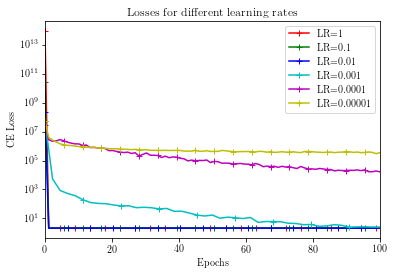

In [52]:
if (not "LRe0_td" in locals()) or( not "LRe0_td" in globals()):

    LRe0_td =utils.getTrainVarsForSetup('ascad_gcnn_LRe0')    
    LRe1_td =utils.getTrainVarsForSetup('ascad_gcnn_LRe-1')    
    LRe2_td =utils.getTrainVarsForSetup('ascad_gcnn_LRe-2')   
    LRe3_td = ascad_gcnn_td
    LRe4_td =utils.getTrainVarsForSetup('ascad_gcnn_LRe-4')    
    LRe5_td =utils.getTrainVarsForSetup('ascad_gcnn_LRe-5')    

LRe0_valid, LRe0_train = utils.showTrainLosses(LRe0_td)
LRe1_valid, LRe1_train = utils.showTrainLosses(LRe1_td)
LRe2_valid, LRe2_train = utils.showTrainLosses(LRe2_td)
LRe3_valid, LRe3_train = utils.showTrainLosses(LRe3_td)
LRe4_valid, LRe4_train = utils.showTrainLosses(LRe4_td)
LRe5_valid, LRe5_train = utils.showTrainLosses(LRe5_td)

idx = np.arange(0,4500,100)

LRe0_train = LRe0_train[:,idx]
LRe1_train = LRe1_train[:,idx]
LRe2_train = LRe2_train[:,idx]
LRe3_train = LRe3_train[:,idx]
LRe4_train = LRe4_train[:,idx]
LRe5_train = LRe5_train[:,idx]

fig = plt.figure()
axes = plt.gca()
#axes.set_ylim([0,30])
plt.yscale('log')

axes.set_xlim([0,100])

xvals_train = np.linspace(0,100,9000)
xvals_valid = np.linspace(0,100,90)


plt.ylabel(r'CE Loss')
plt.xlabel(r'Epochs')

plt.plot(xvals_valid,np.transpose(np.mean(LRe0_valid,axis=0)),color='r',marker='+',markevery=4)
plt.plot(xvals_valid,np.transpose(np.mean(LRe1_valid,axis=0)),color='g',marker='+',markevery=5)
plt.plot(xvals_valid,np.transpose(np.mean(LRe2_valid,axis=0)),color='b',marker='+',markevery=6)
plt.plot(np.linspace(0,100,45),np.transpose(np.mean(LRe3_valid,axis=0)),color='c',marker='+',markevery=5)
plt.plot(xvals_valid,np.transpose(np.mean(LRe4_valid,axis=0)),color='m',marker='+',markevery=5)
plt.plot(xvals_valid,np.transpose(np.mean(LRe5_valid,axis=0)),color='y',marker='+',markevery=5)

plt.legend(['LR=1','LR=0.1','LR=0.01','LR=0.001','LR=0.0001','LR=0.00001'])
plt.title('Losses for different learning rates ')

plt.savefig("ascad_lr_loss.pdf")


9935.7 & 195.9 &9348.0 & 10001.0
10001.0 & 0.0 &10001.0 & 10001.0
10001.0 & 0.0 &10001.0 & 10001.0
10001.0 & 0.0 &10001.0 & 10001.0
10001.0 & 0.0 &10001.0 & 10001.0


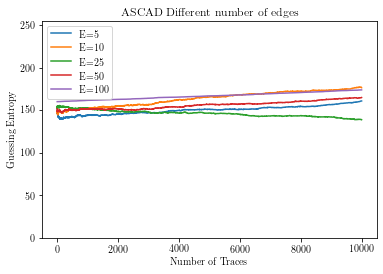

In [53]:
#Number Edges ASCAD
ascadn2 = np.append(all_data['experiments\\20210223\\ascad_gcnn_N2-1']['res'],all_data['experiments\\20210223\\ascad_gcnn_N2-3']['res'],axis=0)
ascadn2 = np.append(ascadn2,all_data['experiments\\20210223\\ascad_gcnn_N2-4']['res'],axis=0)
ascadn2 = np.append(ascadn2,all_data['experiments\\20210223\\ascad_gcnn_N2-5']['res'],axis=0)
ascadn2 = np.append(ascadn2,all_data['experiments\\20210223\\ascad_gcnn_N2-6']['res'],axis=0)
ascadn2 = np.append(ascadn2,all_data['experiments\\20210223\\ascad_gcnn_N2-7']['res'],axis=0)
ascadn2 = np.append(ascadn2,all_data['experiments\\20210223\\ascad_gcnn_N2-10']['res'],axis=0)

ascadn10 = np.append(all_data['experiments\\20210219\\ascad_gcnn_N10-1']['res'],all_data['experiments\\20210219\\ascad_gcnn_N10-2']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210219\\ascad_gcnn_N10-3']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210219\\ascad_gcnn_N10-4']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210219\\ascad_gcnn_N10-5']['res'],axis=0)

ascadn25 = np.append(all_data['experiments\\20210219\\ascad_gcnn_N25-1']['res'],all_data['experiments\\20210219\\ascad_gcnn_N25-2']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210219\\ascad_gcnn_N25-3']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210219\\ascad_gcnn_N25-4']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210219\\ascad_gcnn_N25-5']['res'],axis=0)

ascadn50 = np.append(all_data['experiments\\20210219\\ascad_gcnn_N50-1']['res'],all_data['experiments\\20210220\\ascad_gcnn_N50-1']['res'],axis=0)
ascadn50 = np.append(ascadn50,all_data['experiments\\20210220\\ascad_gcnn_N50-2']['res'],axis=0)
ascadn50 = np.append(ascadn50,all_data['experiments\\20210220\\ascad_gcnn_N50-3']['res'],axis=0)
ascadn50 = np.append(ascadn50,all_data['experiments\\20210220\\ascad_gcnn_N50-4']['res'],axis=0)
ascadn50 = np.append(ascadn50,all_data['experiments\\20210225\\ascad_gcnn_N50-1']['res'],axis=0)

ascadn100 = np.append(all_data['experiments\\20210220\\ascad_gcnn_N100-1']['res'],all_data['experiments\\20210220\\ascad_gcnn_N100-2']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210220\\ascad_gcnn_N100-3']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210220\\ascad_gcnn_N100-4']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210220\\ascad_gcnn_N100-5']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210225\\ascad_gcnn_N100-1']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210225\\ascad_gcnn_N100-2']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210225\\ascad_gcnn_N100-3']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210225\\ascad_gcnn_N100-4']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210225\\ascad_gcnn_N100-5']['res'],axis=0)

fig = plt.figure()
axes = plt.gca()
axes.set_ylim([0,255])

plt.ylabel(r'Guessing Entropy')
plt.xlabel(r'Number of Traces')
plt.title('ASCAD Different number of edges')

labels = ['E=5','E=10','E=25','E=50','E=100']
plt.plot(np.transpose(np.mean(gcnn_data,axis=0)))
plt.plot(np.transpose(np.mean(ascadn10,axis=0)))
plt.plot(np.transpose(np.mean(ascadn25,axis=0)))
plt.plot(np.transpose(np.mean(ascadn50,axis=0)))
plt.plot(np.transpose(np.mean(ascadn100,axis=0)))
plt.legend(labels)
utils.get_traces_t_print(gcnn_data,threshold=10)
utils.get_traces_t_print(ascadn10,threshold=10)
utils.get_traces_t_print(ascadn25,threshold=10)
utils.get_traces_t_print(ascadn50,threshold=10)
utils.get_traces_t_print(ascadn100,threshold=10)
plt.savefig("ascad_nedges.pdf")


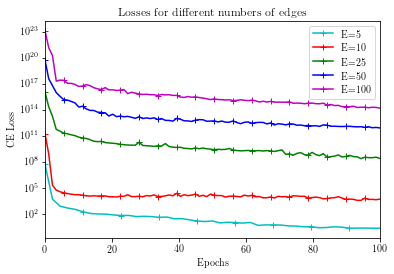

In [54]:
#if (not "nn10_td" in locals()) or( not "nn10_td" in globals()):
nn5_td = ascad_gcnn_td
nn10_td =utils.getTrainVarsForSetup('ascad_gcnn_N10\\')
nn10_td.update(utils.getTrainVarsForSetup('ascad_gcnn_N10-1\\'))
nn10_td.update(utils.getTrainVarsForSetup('ascad_gcnn_N10-2\\'))
nn10_td.update(utils.getTrainVarsForSetup('ascad_gcnn_N10-3\\'))
nn10_td.update(utils.getTrainVarsForSetup('ascad_gcnn_N10-4\\'))
nn10_td.update(utils.getTrainVarsForSetup('ascad_gcnn_N10-5\\'))
nn10_td.update(utils.getTrainVarsForSetup('ascad_gcnn_N10-6\\'))
nn10_td.update(utils.getTrainVarsForSetup('ascad_gcnn_N10-7\\'))
nn10_td.update(utils.getTrainVarsForSetup('ascad_gcnn_N10-8\\'))
nn10_td.update(utils.getTrainVarsForSetup('ascad_gcnn_N10-9\\'))
nn10_td.update(utils.getTrainVarsForSetup('ascad_gcnn_N10-10\\'))


nn25_td =utils.getTrainVarsForSetup('ascad_gcnn_N25')    
nn50_td =utils.getTrainVarsForSetup('ascad_gcnn_N50')    
nn100_td =utils.getTrainVarsForSetup('ascad_gcnn_N100')    

nn5_valid, nn5_train = utils.showTrainLosses(nn5_td)
nn10_valid, nn10_train = utils.showTrainLosses(nn10_td)
nn25_valid, nn25_train = utils.showTrainLosses(nn25_td)
nn50_valid, nn50_train = utils.showTrainLosses(nn50_td)
nn100_valid, nn100_train = utils.showTrainLosses(nn100_td)

idx = np.arange(0,4500,100)

nn5_train = nn5_train[:,idx]
nn10_train = nn10_train[:,idx]
nn25_train = nn25_train[:,idx]
nn50_train = nn50_train[:,idx]
nn100_train = nn100_train[:,idx]

fig = plt.figure()
axes = plt.gca()
#axes.set_ylim([0,30])
plt.yscale('log')
axes.set_xlim([0,100])

xvals_train = np.linspace(0,100,4500)
xvals_valid = np.linspace(0,100,90)


plt.ylabel(r'CE Loss')
plt.xlabel(r'Epochs')
plt.plot(np.linspace(0,100,45),np.transpose(np.mean(nn5_valid,axis=0)),color='c',marker='+',markevery=5)
plt.plot(xvals_valid,np.transpose(np.mean(nn10_valid,axis=0)),color='r',marker='+',markevery=5)
plt.plot(xvals_valid,np.transpose(np.mean(nn25_valid,axis=0)),color='g',marker='+',markevery=5)
plt.plot(xvals_valid,np.transpose(np.mean(nn50_valid,axis=0)),color='b',marker='+',markevery=5)
plt.plot(xvals_valid,np.transpose(np.mean(nn100_valid,axis=0)),color='m',marker='+',markevery=5)
labels = ['E=5','E=10','E=25','E=50','E=100']

plt.legend(labels)
plt.title('Losses for different numbers of edges')
plt.savefig("ascad_nedges_loss.pdf")


10001.0 & 0.0 &10001.0 & 10001.0
10001.0 & 0.0 &10001.0 & 10001.0
10001.0 & 0.0 &10001.0 & 10001.0
6181.909090909091 & 4460.398320055477 &242.0 & 10001.0
10001.0 & 0.0 &10001.0 & 10001.0
10001.0 & 0.0 &10001.0 & 10001.0


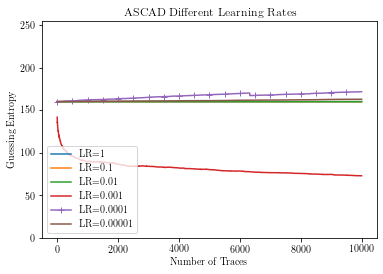

In [55]:
#Learning Rate
#ASCAD IV

LRe0 = np.append(all_data['experiments\\20210222\\ascad_gcnn_IV_LRe0-1']['res'],all_data['experiments\\20210222\\ascad_gcnn_IV_LRe0-2']['res'],axis=0)
LRe0 = np.append(LRe0,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe0-3']['res'],axis=0)
LRe0 = np.append(LRe0,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe0-4']['res'],axis=0)
LRe0 = np.append(LRe0,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe0-5']['res'],axis=0)

LRe1 = np.append(all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-1-1']['res'],all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-1-2']['res'],axis=0)
LRe1 = np.append(LRe1,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-1-3']['res'],axis=0)
LRe1 = np.append(LRe1,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-1-4']['res'],axis=0)
LRe1 = np.append(LRe1,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-1-5']['res'],axis=0)

LRe2 = np.append(all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-2-1']['res'],all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-2-2']['res'],axis=0)
LRe2 = np.append(LRe2,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-2-3']['res'],axis=0)
LRe2 = np.append(LRe2,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-2-4']['res'],axis=0)
LRe2 = np.append(LRe2,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-2-5']['res'],axis=0)

LRe4 = np.append(all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-4-1']['res'],all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-4-2']['res'],axis=0)
LRe4 = np.append(LRe4,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-4-3']['res'],axis=0)
LRe4 = np.append(LRe4,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-4-4']['res'],axis=0)
LRe4 = np.append(LRe4,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-4-5']['res'],axis=0)
LRe4 = np.append(LRe4,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-4-6']['res'],axis=0)

LRe5 = np.append(all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-5-1']['res'],all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-5-2']['res'],axis=0)
LRe5 = np.append(LRe5,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-5-3']['res'],axis=0)
LRe5 = np.append(LRe5,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-5-4']['res'],axis=0)
LRe5 = np.append(LRe5,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-5-5']['res'],axis=0)
LRe5 = np.append(LRe5,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-5-6']['res'],axis=0)

labels = ['LR=1','LR=0.1','LR=0.01','LR=0.001','LR=0.0001','LR=0.00001']

fig = plt.figure()
axes = plt.gca()
axes.set_ylim([0,255])
plt.ylabel(r'Guessing Entropy')
plt.xlabel(r'Number of Traces')
plt.title('ASCAD Different Learning Rates')


plt.plot(np.transpose(np.mean(LRe0,axis=0)))
plt.plot(np.transpose(np.mean(LRe1,axis=0)))
plt.plot(np.transpose(np.mean(LRe2,axis=0)))
plt.plot(np.transpose(np.mean(ascad_gcnn_IV,axis=0))) 
plt.plot(np.transpose(np.mean(LRe4,axis=0)),marker='+',markevery=500)
plt.plot(np.transpose(np.mean(LRe5,axis=0)))

plt.legend(labels)
plt.savefig("ascad_iv_LR.pdf")

utils.get_traces_t_print(LRe0,threshold=10)
utils.get_traces_t_print(LRe1,threshold=10)
utils.get_traces_t_print(LRe2,threshold=10)
utils.get_traces_t_print(ascad_gcnn_IV,threshold=10)
utils.get_traces_t_print(LRe4,threshold=10)
utils.get_traces_t_print(LRe5,threshold=10)

6181.909090909091 & 4460.398320055477 &242.0 & 10001.0
6852.333333333333 & 4463.234558279704 &213.0 & 10001.0
8381.5 & 3621.3212943160215 &264.0 & 10001.0
6109.6 & 4765.992954254129 &238.0 & 10001.0
10001.0 & 0.0 &10001.0 & 10001.0


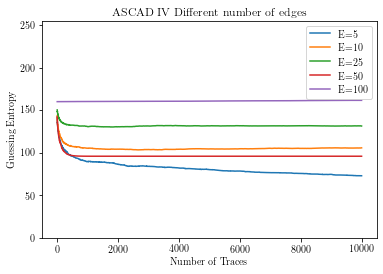

In [56]:
#Number Edges ASCAD
ascadn10 = np.append(all_data['experiments\\20210222\\ascad_gcnn_IV_N10-1']['res'],all_data['experiments\\20210222\\ascad_gcnn_IV_N10-2']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210223\\ascad_gcnn_IV_N10-1']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210223\\ascad_gcnn_IV_N10-2']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210223\\ascad_gcnn_IV_N10-3']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210223\\ascad_gcnn_IV_N10-4']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210223\\ascad_gcnn_IV_N10-5']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210223\\ascad_gcnn_IV_N10-6']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210223\\ascad_gcnn_IV_N10-7']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210223\\ascad_gcnn_IV_N10-8']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210223\\ascad_gcnn_IV_N10-9']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210223\\ascad_gcnn_IV_N10-10']['res'],axis=0)

ascadn25 = np.append(all_data['experiments\\20210222\\ascad_gcnn_IV_N25-1']['res'],all_data['experiments\\20210222\\ascad_gcnn_IV_N25-2']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210223\\ascad_gcnn_IV_N25-1']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210223\\ascad_gcnn_IV_N25-2']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210223\\ascad_gcnn_IV_N25-3']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210223\\ascad_gcnn_IV_N25-4']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210223\\ascad_gcnn_IV_N25-5']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210223\\ascad_gcnn_IV_N25-6']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210223\\ascad_gcnn_IV_N25-7']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210223\\ascad_gcnn_IV_N25-8']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210223\\ascad_gcnn_IV_N25-9']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210223\\ascad_gcnn_IV_N25-10']['res'],axis=0)

ascadn50 = np.append(all_data['experiments\\20210222\\ascad_gcnn_IV_N50-1']['res'],all_data['experiments\\20210223\\ascad_gcnn_IV_N50-1']['res'],axis=0)
ascadn50 = np.append(ascadn50,all_data['experiments\\20210223\\ascad_gcnn_IV_N50-2']['res'],axis=0)
ascadn50 = np.append(ascadn50,all_data['experiments\\20210223\\ascad_gcnn_IV_N50-3']['res'],axis=0)
ascadn50 = np.append(ascadn50,all_data['experiments\\20210223\\ascad_gcnn_IV_N50-4']['res'],axis=0)
ascadn50 = np.append(ascadn50,all_data['experiments\\20210223\\ascad_gcnn_IV_N50-5']['res'],axis=0)
ascadn50 = np.append(ascadn50,all_data['experiments\\20210223\\ascad_gcnn_IV_N50-6']['res'],axis=0)
ascadn50 = np.append(ascadn50,all_data['experiments\\20210223\\ascad_gcnn_IV_N50-7']['res'],axis=0)
ascadn50 = np.append(ascadn50,all_data['experiments\\20210223\\ascad_gcnn_IV_N50-8']['res'],axis=0)
ascadn50 = np.append(ascadn50,all_data['experiments\\20210223\\ascad_gcnn_IV_N50-9']['res'],axis=0)

ascadn100 = np.append(all_data['experiments\\20210222\\ascad_gcnn_IV_N100-1']['res'],all_data['experiments\\20210222\\ascad_gcnn_IV_N100-2']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210222\\ascad_gcnn_IV_N100-3']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210222\\ascad_gcnn_IV_N100-4']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210222\\ascad_gcnn_IV_N100-5']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210222\\ascad_gcnn_IV_N100-6']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210224\\ascad_gcnn_IV_N100-1']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210224\\ascad_gcnn_IV_N100-2']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210224\\ascad_gcnn_IV_N100-3']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210224\\ascad_gcnn_IV_N100-4']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210224\\ascad_gcnn_IV_N100-5']['res'],axis=0)

fig = plt.figure()
axes = plt.gca()
axes.set_ylim([0,255])

plt.ylabel(r'Guessing Entropy')
plt.xlabel(r'Number of Traces')
plt.title('ASCAD IV Different number of edges')

labels = ['E=5','E=10','E=25','E=50','E=100']
plt.plot(np.transpose(np.mean(ascad_gcnn_IV,axis=0)))
plt.plot(np.transpose(np.mean(ascadn10,axis=0)))
plt.plot(np.transpose(np.mean(ascadn25,axis=0)))
plt.plot(np.transpose(np.mean(ascadn50,axis=0)))
plt.plot(np.transpose(np.mean(ascadn100,axis=0)))
plt.legend(labels)
plt.savefig("ascad_iv_nedges.pdf")

utils.get_traces_t_print(ascad_gcnn_IV,threshold=10)
utils.get_traces_t_print(ascadn10,threshold=10)
utils.get_traces_t_print(ascadn25,threshold=10)
utils.get_traces_t_print(ascadn50,threshold=10)
utils.get_traces_t_print(ascadn100,threshold=10)

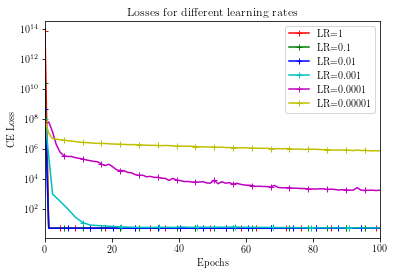

In [57]:
if (not "LRe0_IV_td" in locals()) or( not "LRe0_IV_td" in globals()):

    LRe0_IV_td =utils.getTrainVarsForSetup('ascad_gcnn_IV_LRe0')    
    LRe1_IV_td =utils.getTrainVarsForSetup('ascad_gcnn_IV_LRe-1')    
    LRe2_IV_td =utils.getTrainVarsForSetup('ascad_gcnn_IV_LRe-2')   
    LRe3_IV_td = ascad_iv_td
    LRe4_IV_td =utils.getTrainVarsForSetup('ascad_gcnn_IV_LRe-4')    
    LRe5_IV_td =utils.getTrainVarsForSetup('ascad_gcnn_IV_LRe-5')    

LRe0_valid, LRe0_train = utils.showTrainLosses(LRe0_IV_td)
LRe1_valid, LRe1_train = utils.showTrainLosses(LRe1_IV_td)
LRe2_valid, LRe2_train = utils.showTrainLosses(LRe2_IV_td)
LRe3_valid, LRe3_train = utils.showTrainLosses(LRe3_IV_td)
LRe4_valid, LRe4_train = utils.showTrainLosses(LRe4_IV_td)
LRe5_valid, LRe5_train = utils.showTrainLosses(LRe5_IV_td)

idx = np.arange(0,4500,100)

LRe0_train = LRe0_train[:,idx]
LRe1_train = LRe1_train[:,idx]
LRe2_train = LRe2_train[:,idx]
LRe3_train = LRe3_train[:,idx]
LRe4_train = LRe4_train[:,idx]
LRe5_train = LRe5_train[:,idx]

fig = plt.figure()
axes = plt.gca()
plt.yscale('log')
axes.set_xlim([0,100])

xvals_train = np.linspace(0,100,9000)
xvals_valid = np.linspace(0,100,90)


plt.ylabel(r'CE Loss')
plt.xlabel(r'Epochs')

plt.plot(xvals_valid,np.transpose(np.mean(LRe0_valid,axis=0)),color='r',marker='+',markevery=4)
plt.plot(xvals_valid,np.transpose(np.mean(LRe1_valid,axis=0)),color='g',marker='+',markevery=5)
plt.plot(xvals_valid,np.transpose(np.mean(LRe2_valid,axis=0)),color='b',marker='+',markevery=6)
plt.plot(np.linspace(0,100,45),np.transpose(np.mean(LRe3_valid,axis=0)),color='c',marker='+',markevery=5)
plt.plot(xvals_valid,np.transpose(np.mean(LRe4_valid,axis=0)),color='m',marker='+',markevery=5)
plt.plot(xvals_valid,np.transpose(np.mean(LRe5_valid,axis=0)),color='y',marker='+',markevery=5)

plt.legend(['LR=1','LR=0.1','LR=0.01','LR=0.001','LR=0.0001','LR=0.00001'])
plt.title('Losses for different learning rates')

plt.savefig("ascad_iv_LR_losses.pdf")


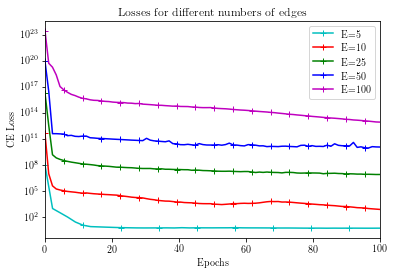

In [58]:
nn5_IV_td = ascad_iv_td
nn10_IV_td =utils.getTrainVarsForSetup('ascad_gcnn_IV_N10\\')    
nn10_IV_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_N10-1\\'))
nn10_IV_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_N10-2\\'))
nn10_IV_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_N10-3\\'))
nn10_IV_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_N10-4\\'))
nn10_IV_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_N10-5\\'))
nn10_IV_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_N10-6\\'))
nn10_IV_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_N10-7\\'))
nn10_IV_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_N10-8\\'))
nn10_IV_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_N10-9\\'))
nn10_IV_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_N10-10\\'))


nn25_IV_td =utils.getTrainVarsForSetup('ascad_gcnn_IV_N25')    
nn50_IV_td =utils.getTrainVarsForSetup('ascad_gcnn_IV_N50')    
nn100_IV_td =utils.getTrainVarsForSetup('ascad_gcnn_IV_N100')    

nn5_valid, nn5_train = utils.showTrainLosses(nn5_IV_td)
nn10_valid, nn10_train = utils.showTrainLosses(nn10_IV_td)
nn25_valid, nn25_train = utils.showTrainLosses(nn25_IV_td)
nn50_valid, nn50_train = utils.showTrainLosses(nn50_IV_td)
nn100_valid, nn100_train = utils.showTrainLosses(nn100_IV_td)

idx = np.arange(0,4500,100)

nn5_train = nn5_train[:,idx]
nn10_train = nn10_train[:,idx]
nn25_train = nn25_train[:,idx]
nn50_train = nn50_train[:,idx]
nn100_train = nn100_train[:,idx]

fig = plt.figure()
axes = plt.gca()
#axes.set_ylim([0,30])
plt.yscale('log')
axes.set_xlim([0,100])

xvals_train = np.linspace(0,100,4500)
xvals_valid = np.linspace(0,100,90)


plt.ylabel(r'CE Loss')
plt.xlabel(r'Epochs')
plt.plot(np.linspace(0,100,45),np.transpose(np.mean(nn5_valid,axis=0)),color='c',marker='+',markevery=5)
plt.plot(xvals_valid,np.transpose(np.mean(nn10_valid,axis=0)),color='r',marker='+',markevery=5)
plt.plot(xvals_valid,np.transpose(np.mean(nn25_valid,axis=0)),color='g',marker='+',markevery=5)
plt.plot(xvals_valid,np.transpose(np.mean(nn50_valid,axis=0)),color='b',marker='+',markevery=5)
plt.plot(xvals_valid,np.transpose(np.mean(nn100_valid,axis=0)),color='m',marker='+',markevery=5)
labels = ['E=5','E=10','E=25','E=50','E=100']

plt.legend(labels)
plt.title('Losses for different numbers of edges')
plt.savefig("ascad_iv_nedges_losses.pdf")
